In [1]:
#######################################################################################################################
# Project: Deep Virtual Rapport Agent (rapport model)
#
#     Jan Ondras (jo951030@gmail.com)
#     Institute for Creative Technologies, University of Southern California
#     April-October 2019
#
#######################################################################################################################
# Plot the outputs from the WebRTC Voice Activity Detection: binary voice activity and audio waveform for each subject.
#######################################################################################################################

sessid_01_P1_sid_09
	Sampling rate: 8000


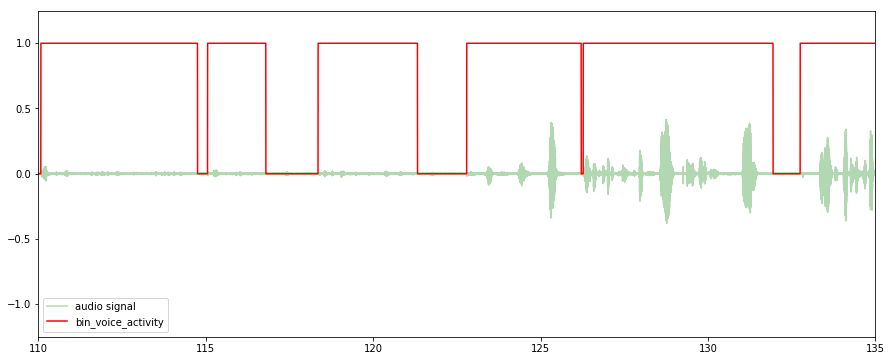

sessid_01_P2_sid_02
	Sampling rate: 8000


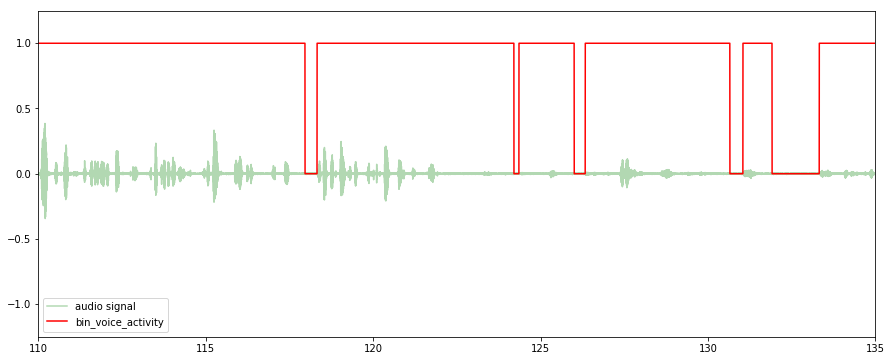

sessid_02_P1_sid_09
	Sampling rate: 8000


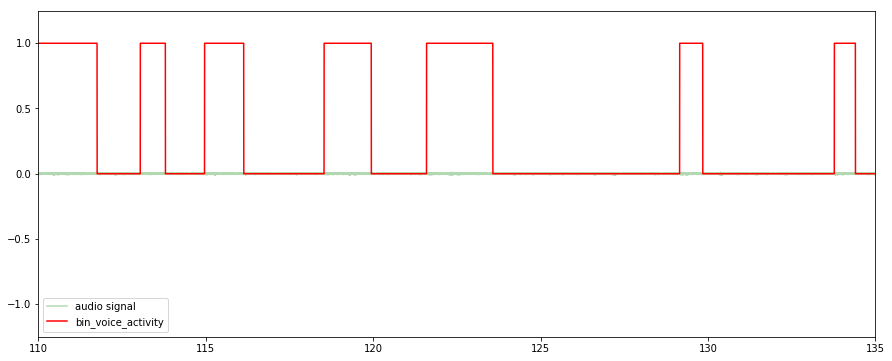

sessid_02_P2_sid_17
	Sampling rate: 8000


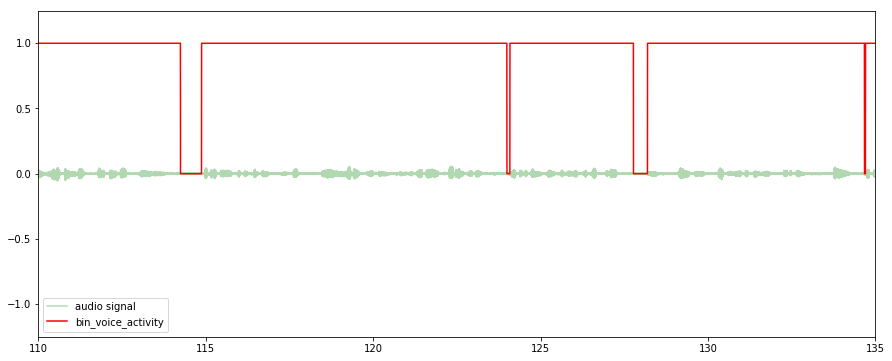

sessid_03_P1_sid_17
	Sampling rate: 8000


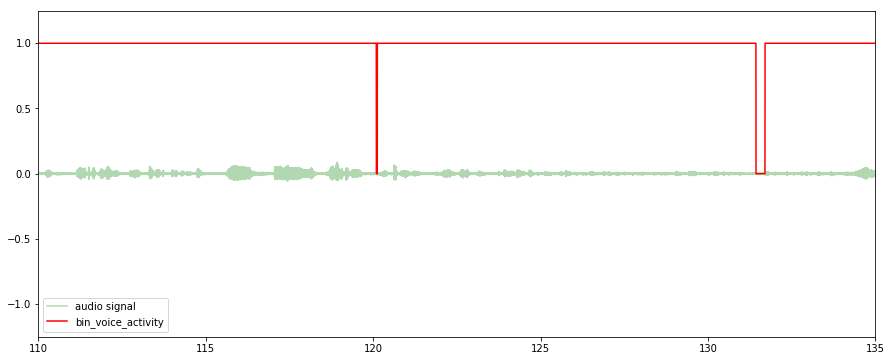

sessid_03_P2_sid_02
	Sampling rate: 8000


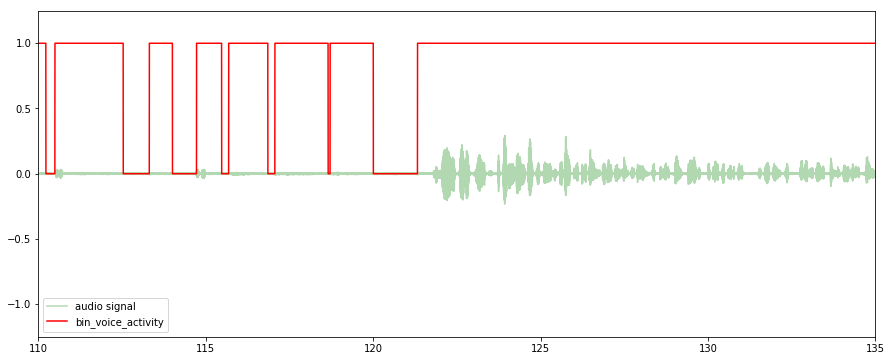

sessid_04_P1_sid_12
	Sampling rate: 8000


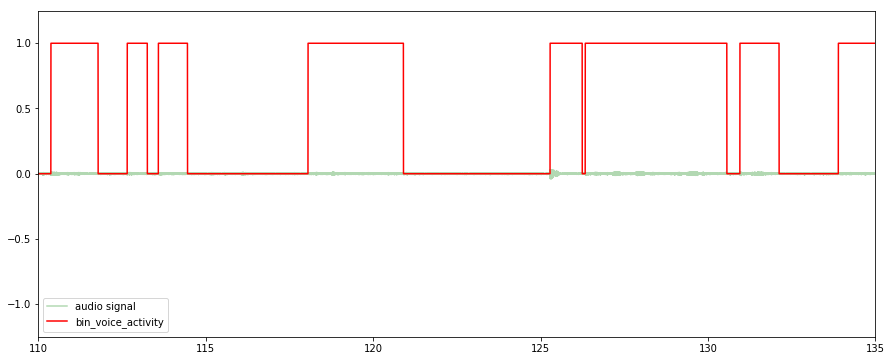

sessid_04_P2_sid_23
	Sampling rate: 8000


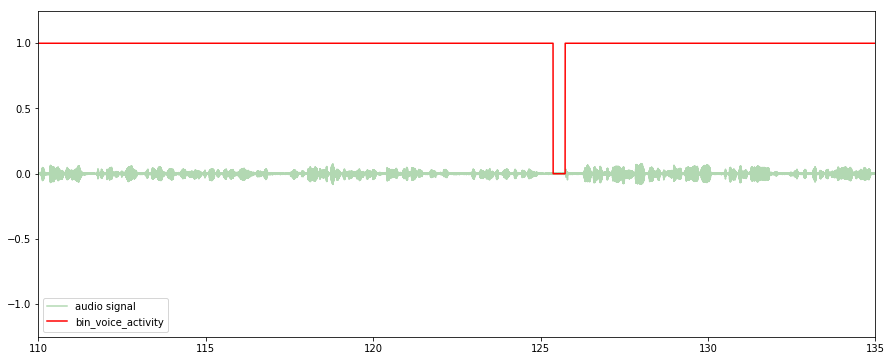

sessid_05_P1_sid_12
	Sampling rate: 8000


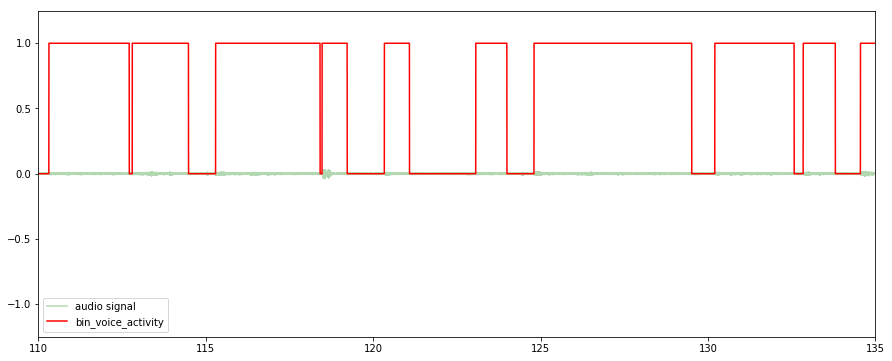

sessid_05_P2_sid_21
	Sampling rate: 8000


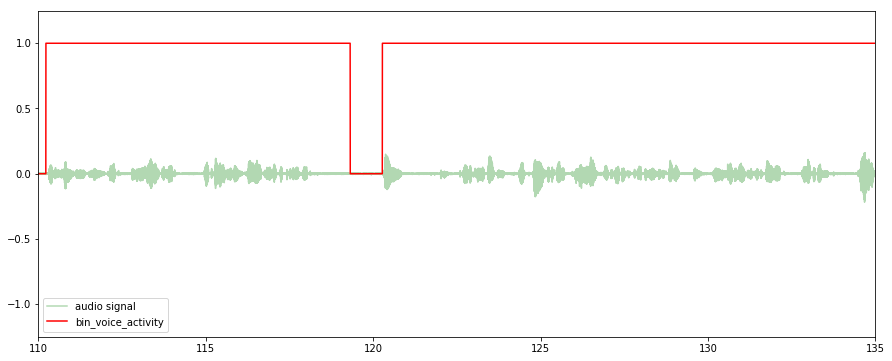

sessid_06_P1_sid_23
	Sampling rate: 8000


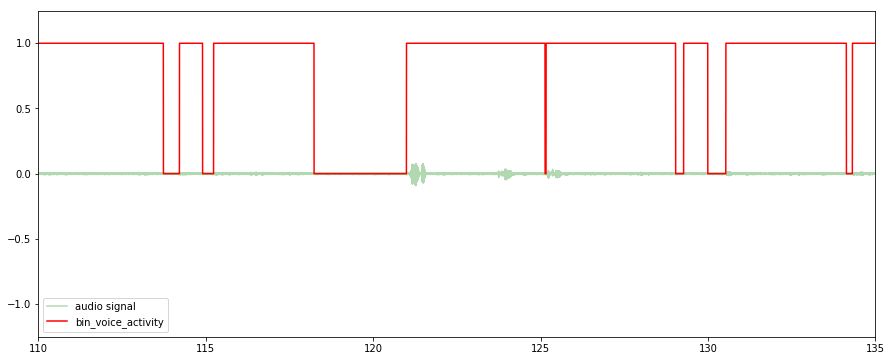

sessid_06_P2_sid_21
	Sampling rate: 8000


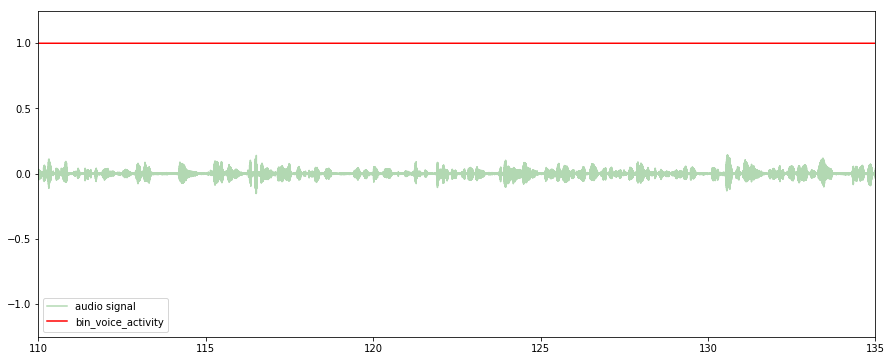

sessid_07_P1_sid_09
	Sampling rate: 8000


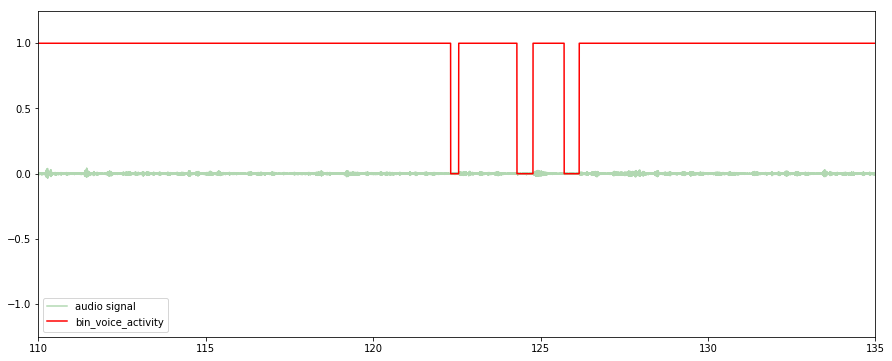

sessid_07_P2_sid_01
	Sampling rate: 8000


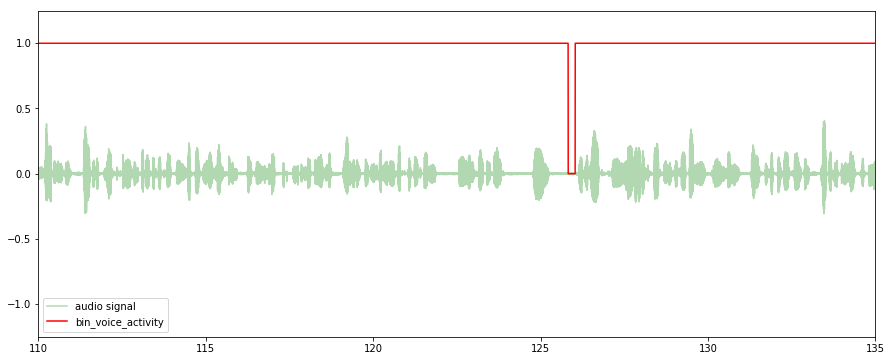

sessid_08_P1_sid_09
	Sampling rate: 8000


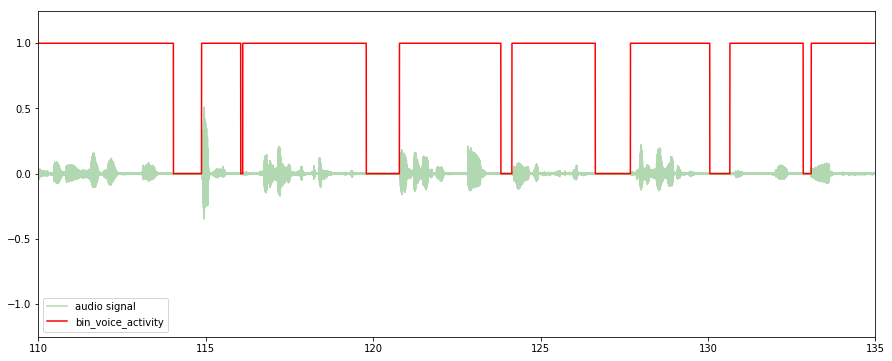

sessid_08_P2_sid_04
	Sampling rate: 8000


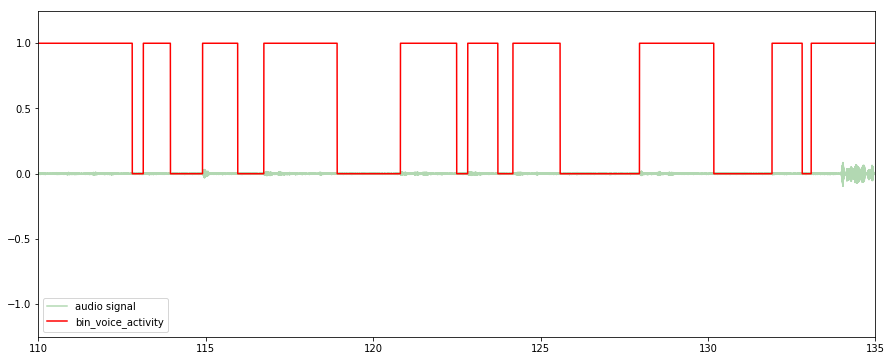

sessid_09_P1_sid_01
	Sampling rate: 8000


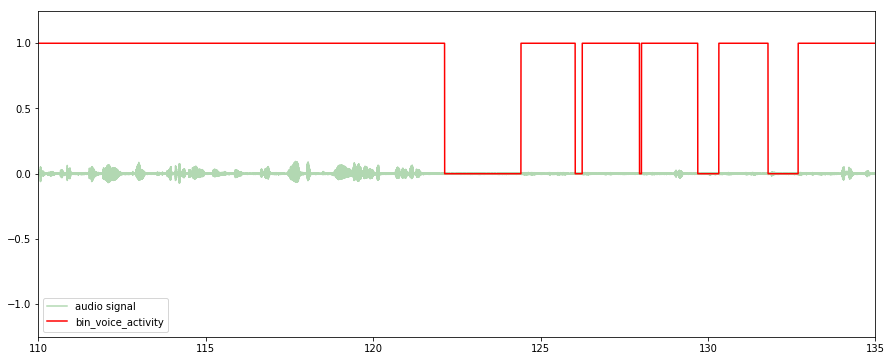

sessid_09_P2_sid_04
	Sampling rate: 8000


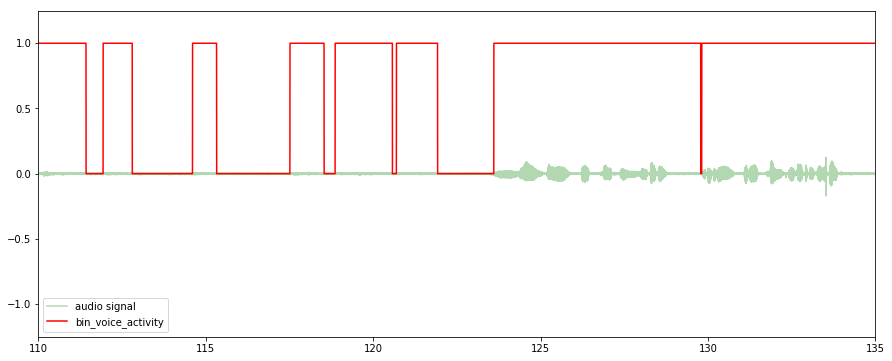

sessid_10_P1_sid_09
	Sampling rate: 8000


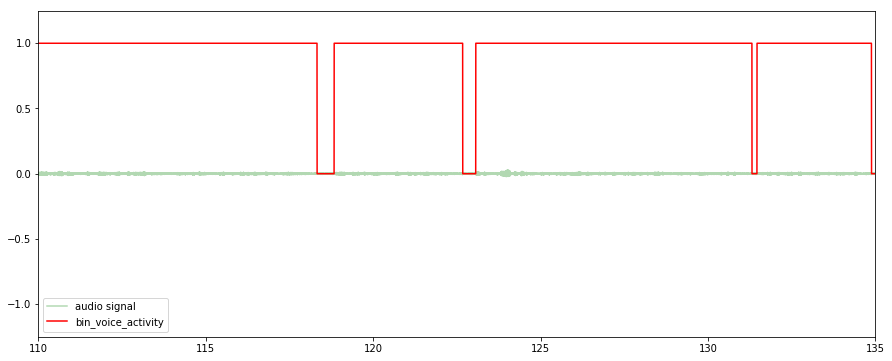

sessid_10_P2_sid_34
	Sampling rate: 8000


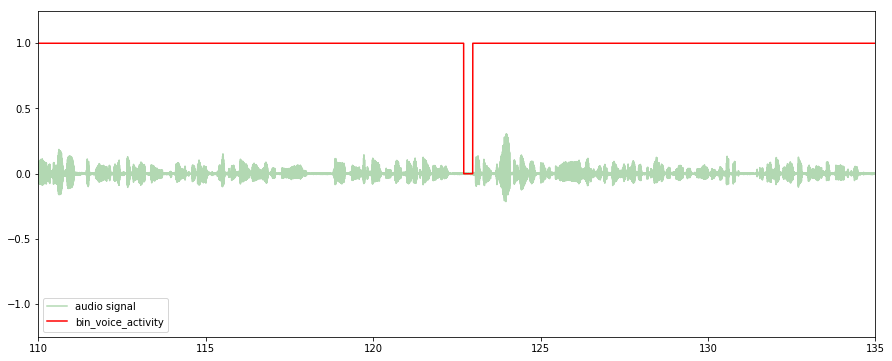

sessid_11_P1_sid_09
	Sampling rate: 8000


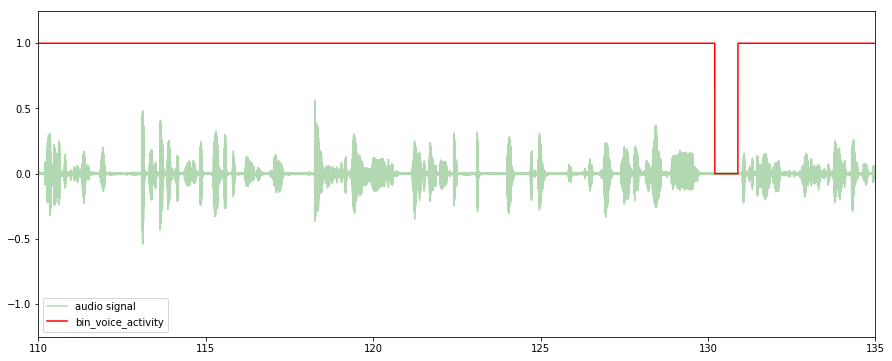

sessid_11_P2_sid_15
	Sampling rate: 8000


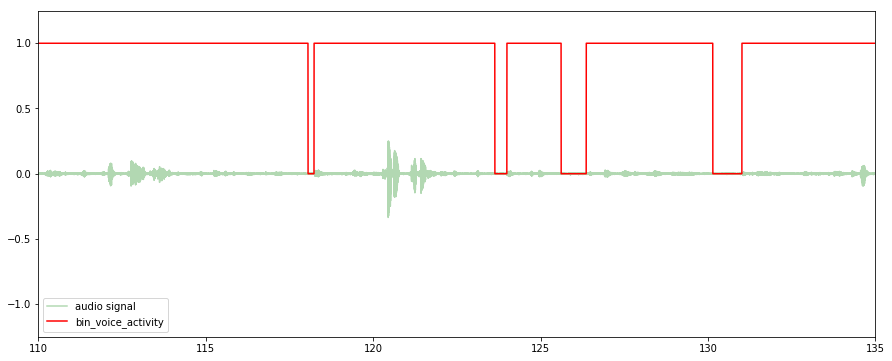

sessid_12_P1_sid_15
	Sampling rate: 8000


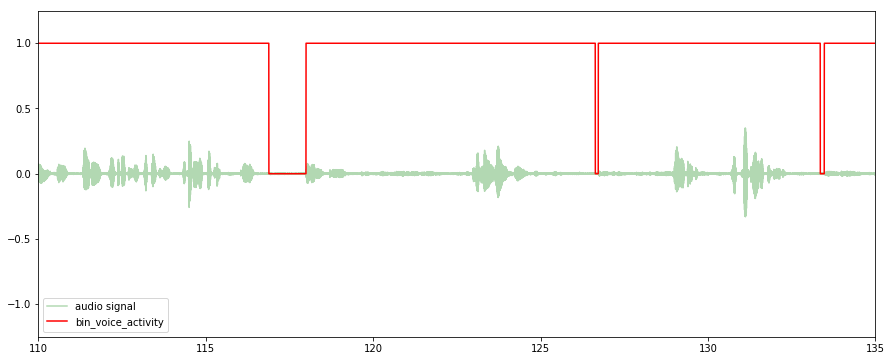

sessid_12_P2_sid_11
	Sampling rate: 8000


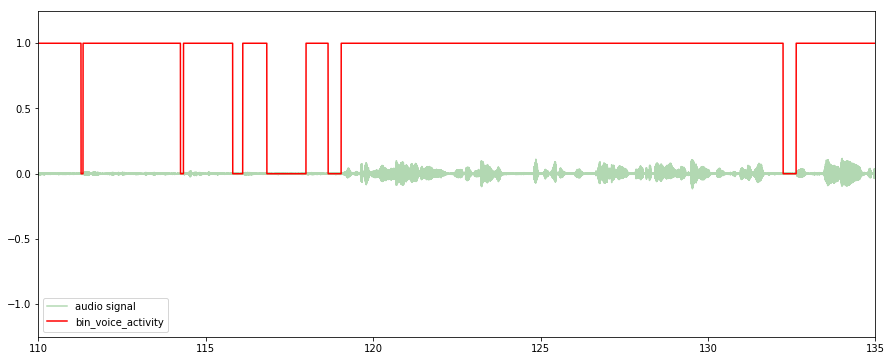

sessid_13_P1_sid_09
	Sampling rate: 8000


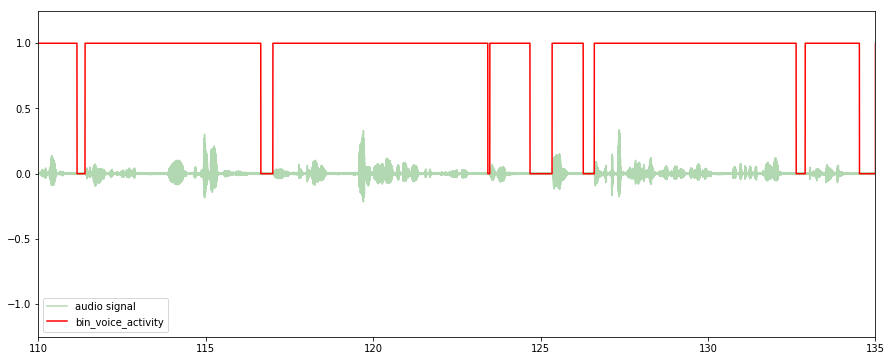

sessid_13_P2_sid_19
	Sampling rate: 8000


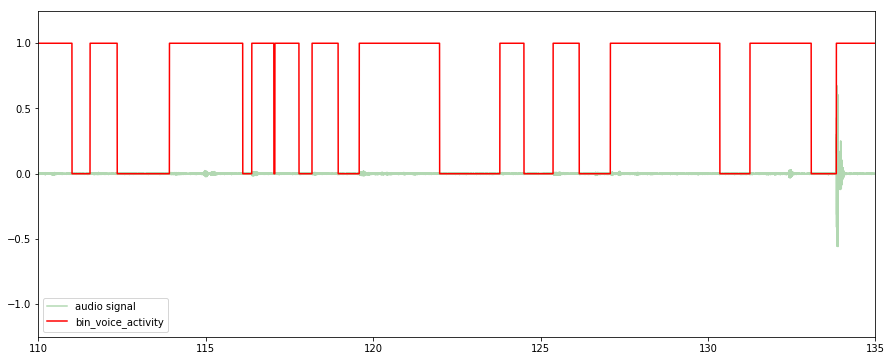

sessid_14_P1_sid_19
	Sampling rate: 8000


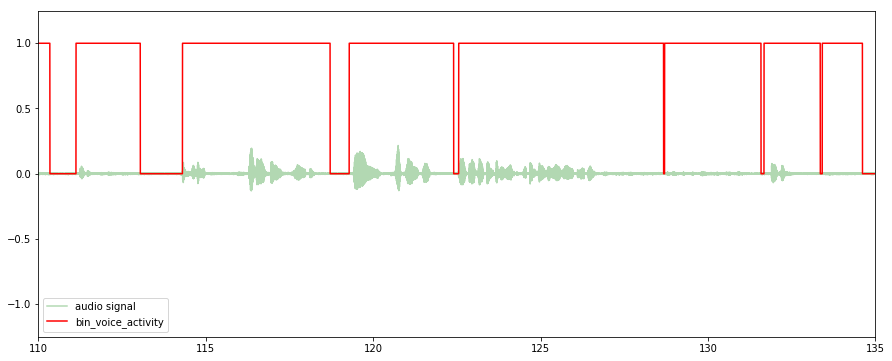

sessid_14_P2_sid_06
	Sampling rate: 8000


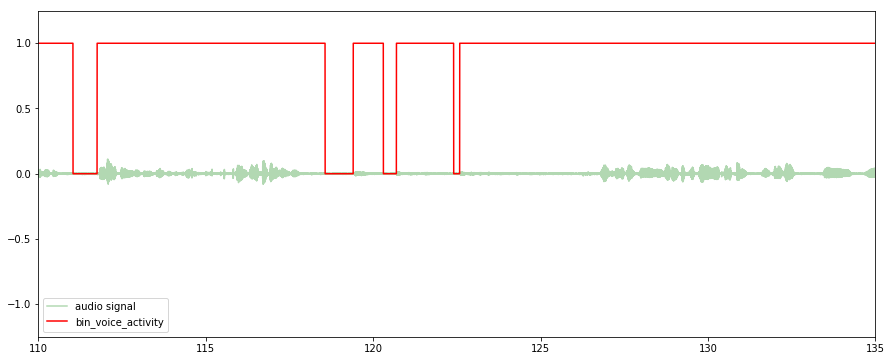

sessid_15_P1_sid_09
	Sampling rate: 8000


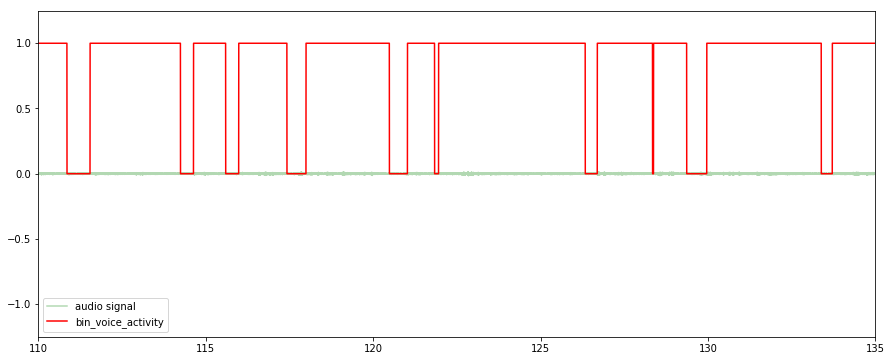

sessid_15_P2_sid_16
	Sampling rate: 8000


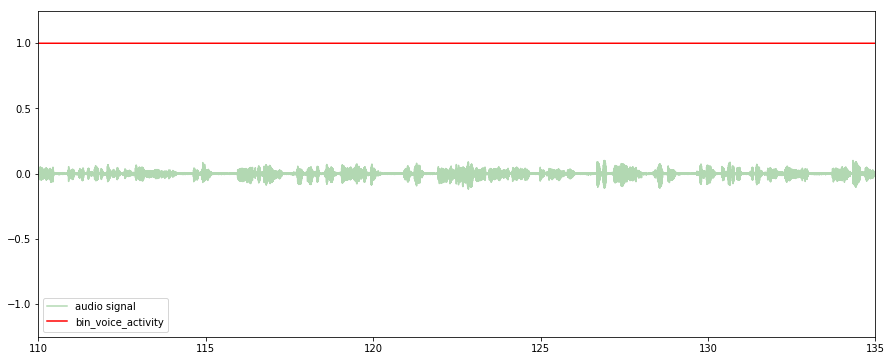

sessid_16_P1_sid_24
	Sampling rate: 8000


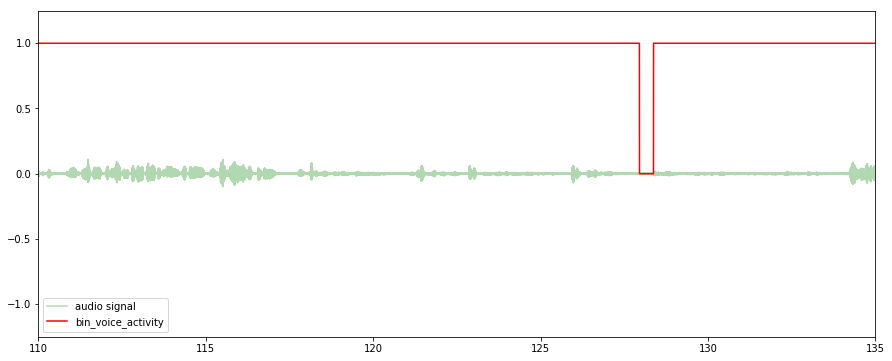

sessid_16_P2_sid_16
	Sampling rate: 8000


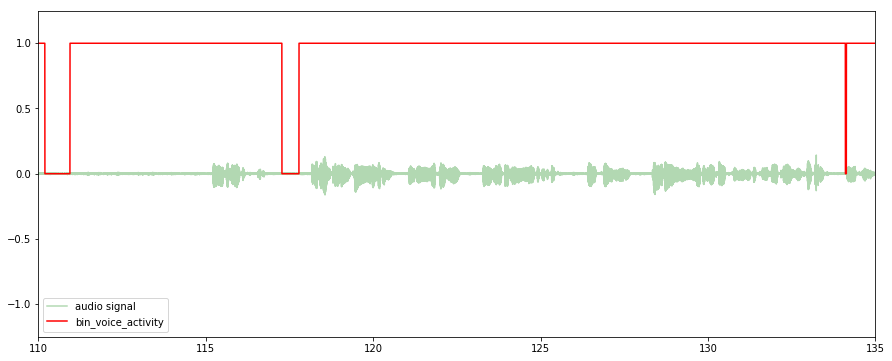

sessid_17_P1_sid_09
	Sampling rate: 8000


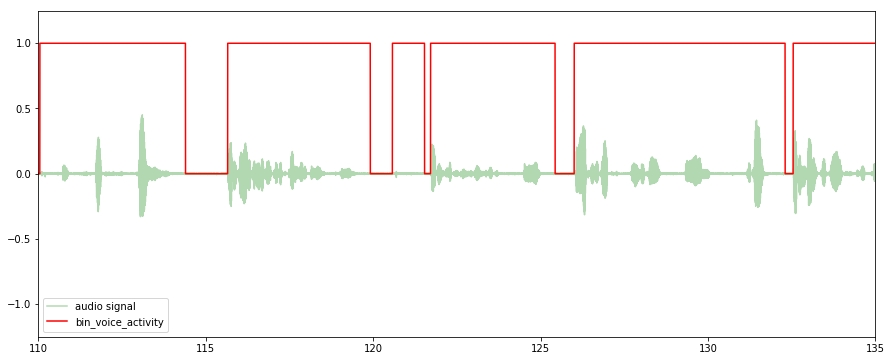

sessid_17_P2_sid_43
	Sampling rate: 8000


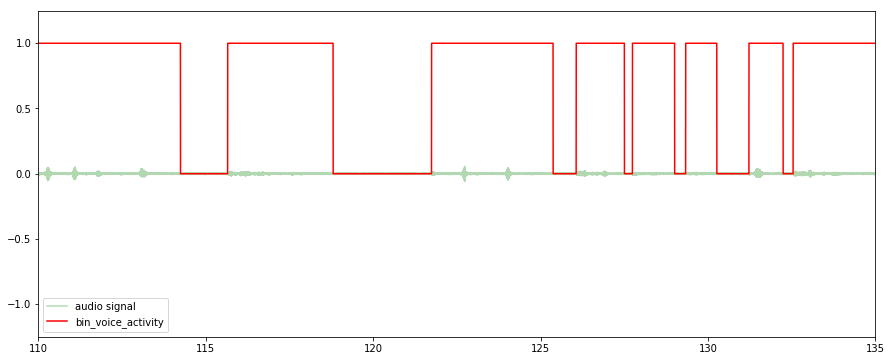

sessid_18_P1_sid_03
	Sampling rate: 8000


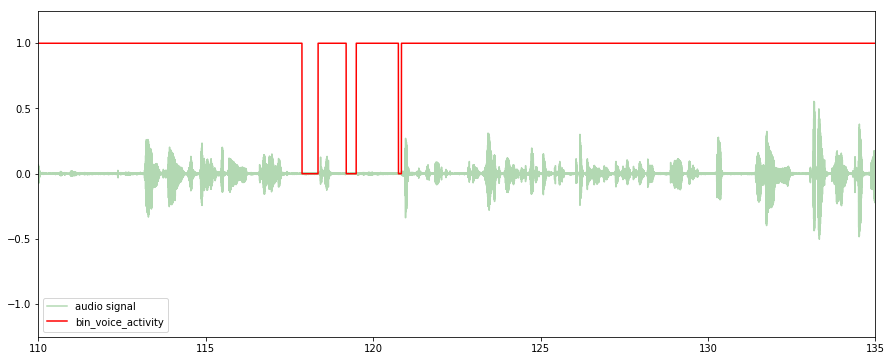

sessid_18_P2_sid_43
	Sampling rate: 8000


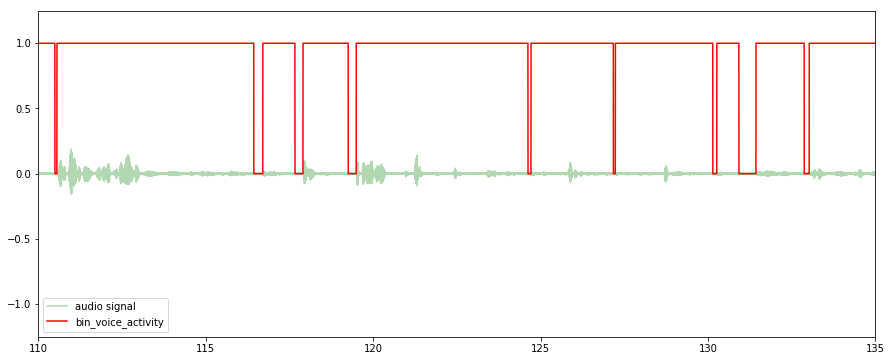

sessid_19_P1_sid_09
	Sampling rate: 8000


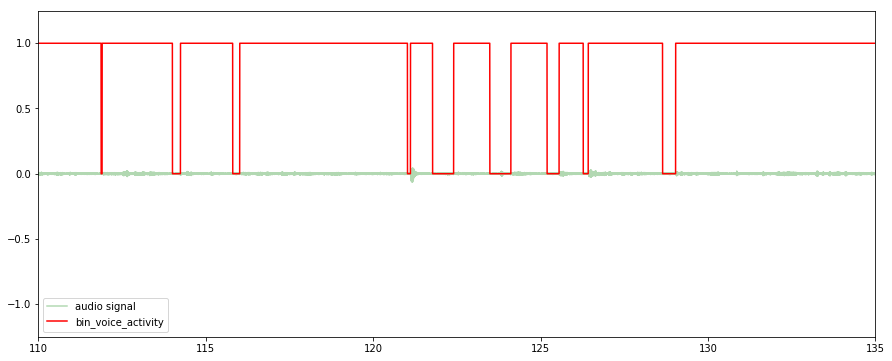

sessid_19_P2_sid_22
	Sampling rate: 8000


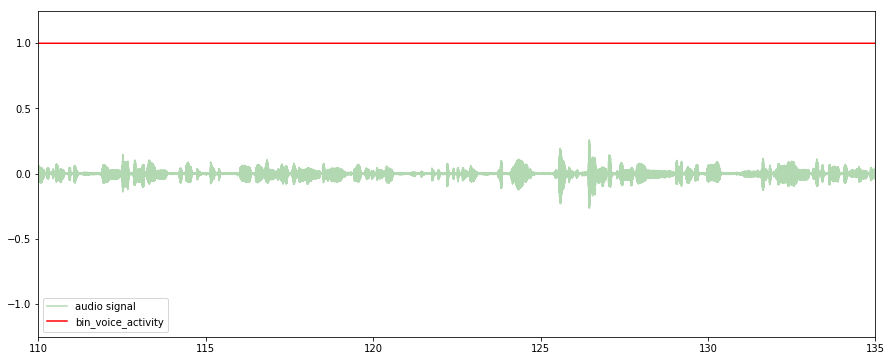

sessid_20_P1_sid_09
	Sampling rate: 8000


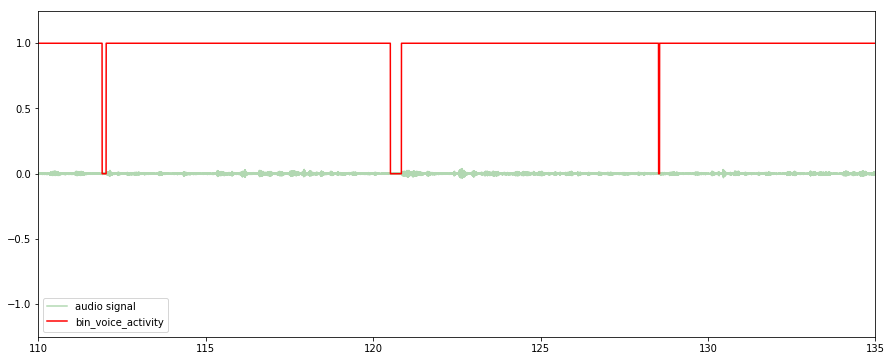

sessid_20_P2_sid_50
	Sampling rate: 8000


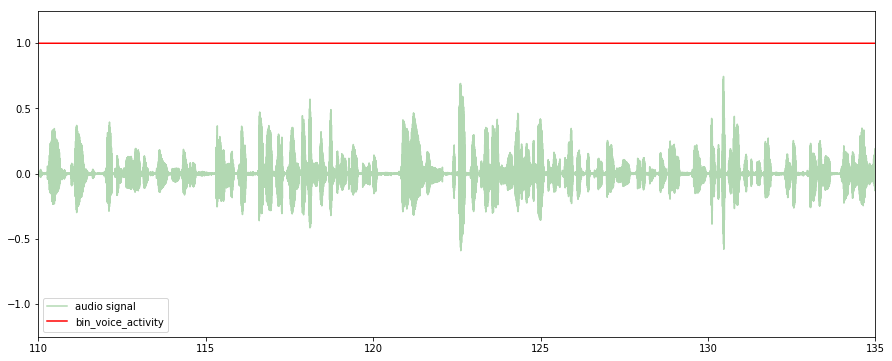

sessid_21_P1_sid_50
	Sampling rate: 8000


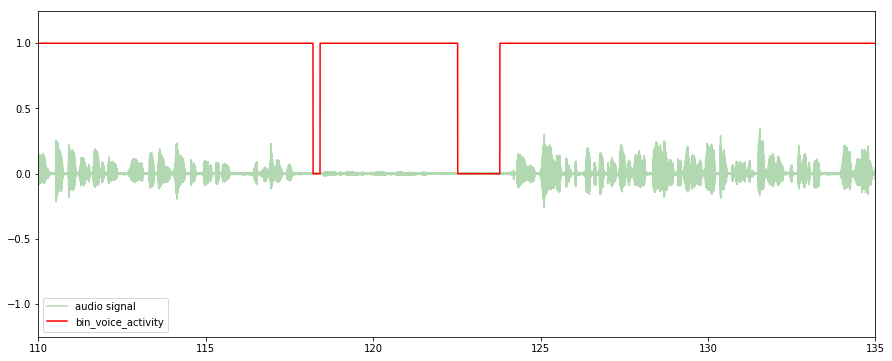

sessid_21_P2_sid_22
	Sampling rate: 8000


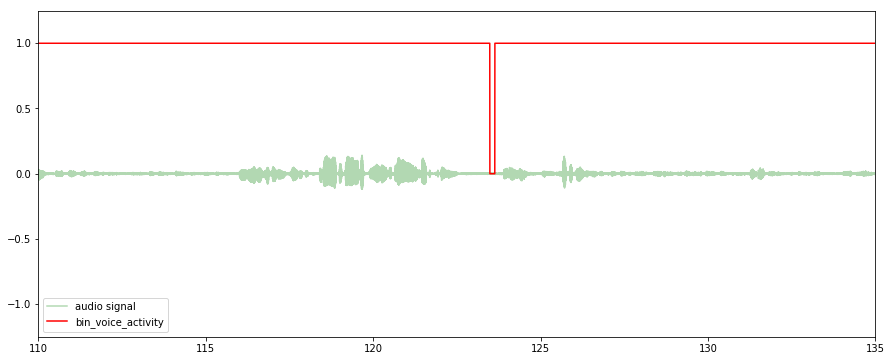

sessid_22_P1_sid_12
	Sampling rate: 8000


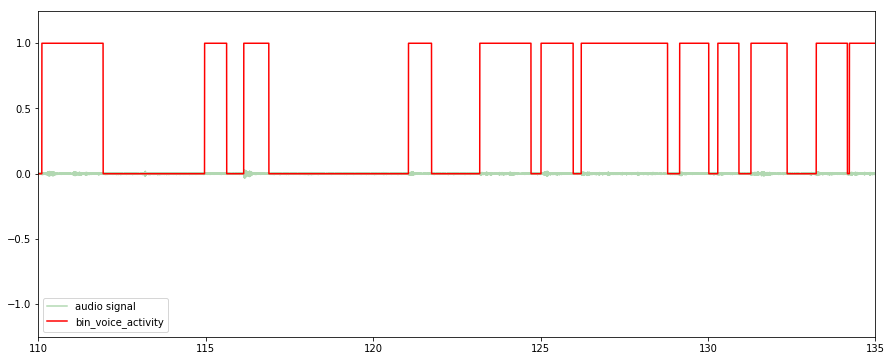

sessid_22_P2_sid_18
	Sampling rate: 8000


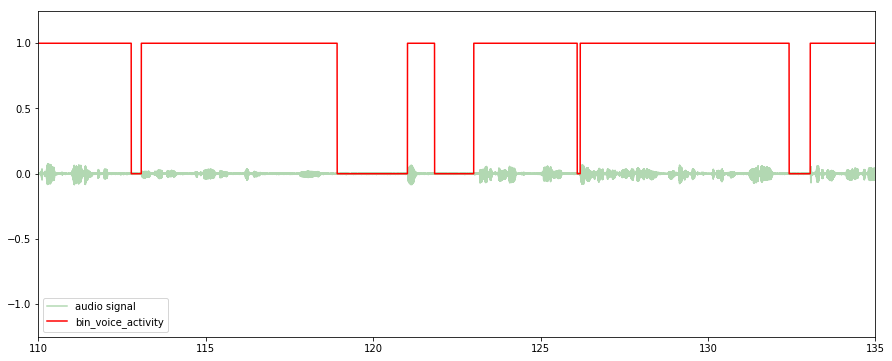

sessid_23_P1_sid_12
	Sampling rate: 8000


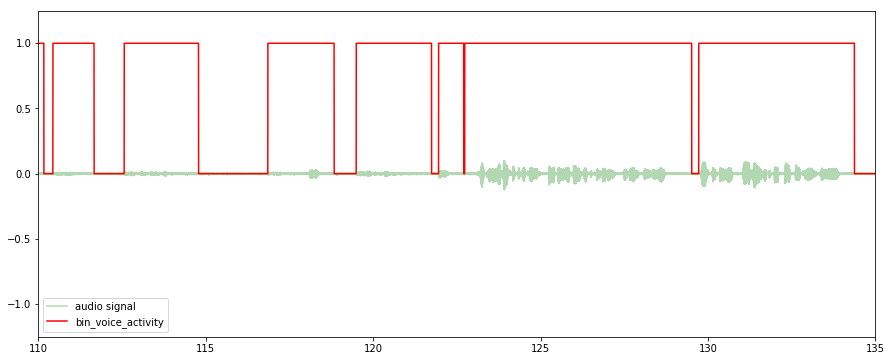

sessid_23_P2_sid_39
	Sampling rate: 8000


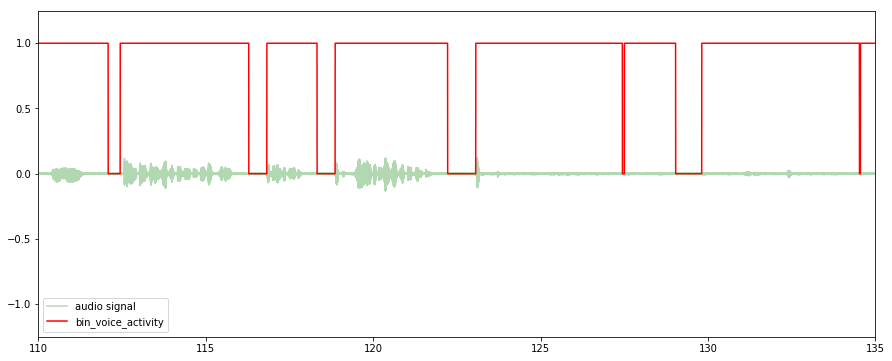

sessid_24_P1_sid_18
	Sampling rate: 8000


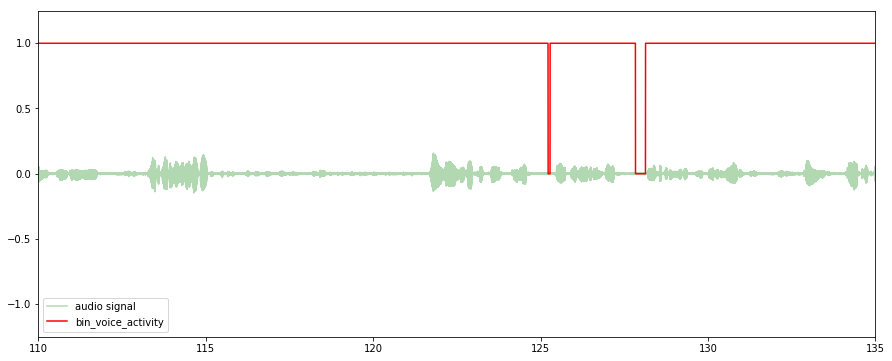

sessid_24_P2_sid_39
	Sampling rate: 8000


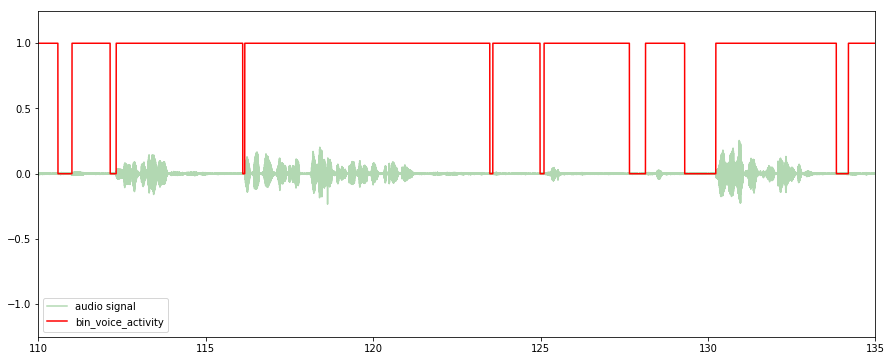

sessid_25_P1_sid_12
	Sampling rate: 8000


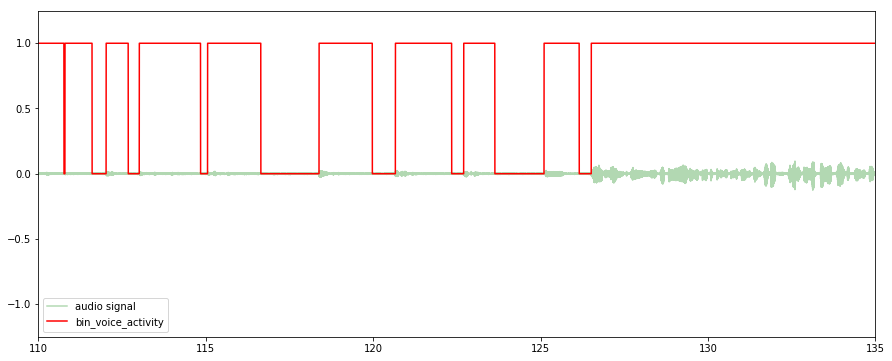

sessid_25_P2_sid_27
	Sampling rate: 8000


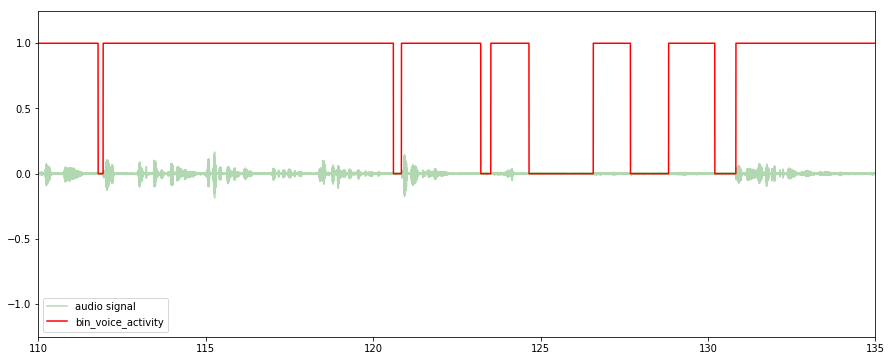

sessid_26_P1_sid_12
	Sampling rate: 8000


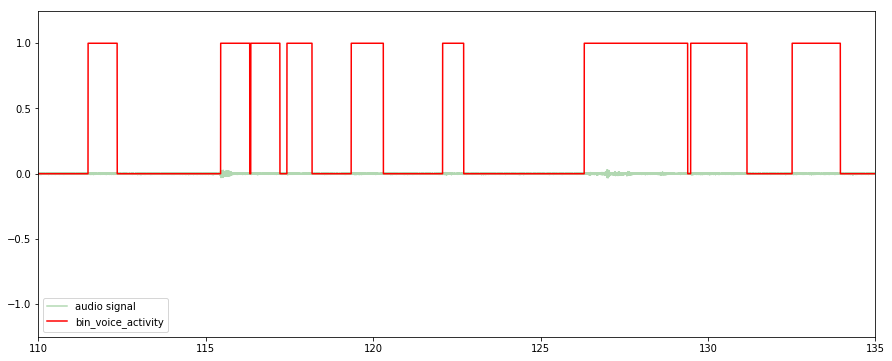

sessid_26_P2_sid_32
	Sampling rate: 8000


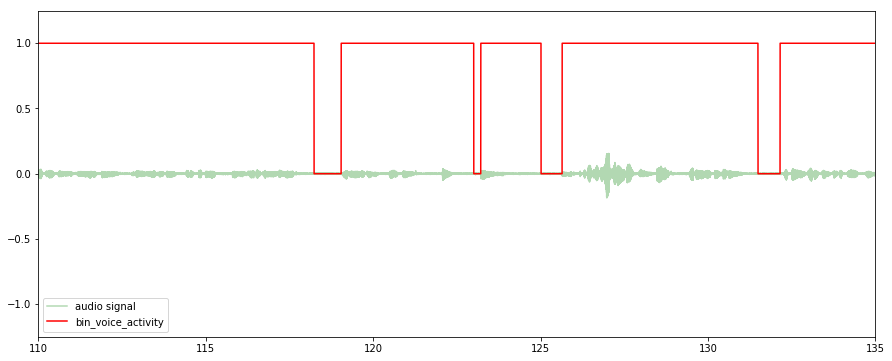

sessid_27_P1_sid_27
	Sampling rate: 8000


In [ ]:
import glob
import numpy as np
import pandas as pd
import librosa
import soundfile as sf
from matplotlib import pyplot as plt

# Agressiveness of VAD: 0-3
AGGRESSIVENESS = 3

# Path to VAD OS outputs
vad_webrtc_outputs_dir = f'/home/ICT2000/jondras/dvra_datasets/mimicry/voice_activity_detection/vad_webrtc_{AGGRESSIVENESS}'
mono_audio_dir = '/home/ICT2000/jondras/dvra_datasets/mimicry/audio/audio_separated_8kHz'

# Iterate over VAD output segments
for i, vad_webrtc_output_file in enumerate(sorted(glob.glob(f'{vad_webrtc_outputs_dir}/vad_webrtc_*.csv'))):
    
    output_filename_split = vad_webrtc_output_file.split('/')[-1][:-4].split('_')
    audio_basename = '_'.join(output_filename_split[2:])
    print(audio_basename)
    
    # Load audio signal
    audio_signal, samplerate = sf.read(f'{mono_audio_dir}/{audio_basename}.wav')
    print(f'\tSampling rate: {samplerate}')
    x_audio_signal = np.arange(0, len(audio_signal) / samplerate, 1. / samplerate)[:len(audio_signal)]
    
    # Generate binary voice activity
    bin_voice_activity = np.zeros(len(audio_signal), dtype=int)
    df = pd.read_csv(vad_webrtc_output_file)
    for row in df.values:
        # print(row)
        bin_voice_activity = np.where((x_audio_signal >= row[0]) & (x_audio_signal <= row[1]), 1, bin_voice_activity)
    
    # Plot raw audio signal and bin_voice_activity
    plt.figure(figsize=[15,6])
    plt.plot(x_audio_signal, audio_signal, 'g-', alpha=0.3, label='audio signal')#,linewidth=2.0)
    plt.plot(x_audio_signal, bin_voice_activity,'r-', label='bin_voice_activity')#,linewidth=2.0)
    plt.xlim(110, 135)
    plt.ylim(-1.25, 1.25)
    plt.legend()
    plt.show()
    
#     break
        
print(f'Processed {i + 1} vad webrtc output files.')

In [ ]:
import glob
import numpy as np
import pandas as pd
import librosa
import soundfile as sf
from matplotlib import pyplot as plt

# Agressiveness of VAD: 0-3
AGGRESSIVENESS = 1

# Path to VAD OS outputs
vad_webrtc_outputs_dir = f'/home/ICT2000/jondras/dvra_datasets/mimicry/voice_activity_detection/vad_webrtc_{AGGRESSIVENESS}'
mono_audio_dir = '/home/ICT2000/jondras/dvra_datasets/mimicry/audio/audio_separated_8kHz'

# Iterate over VAD output segments
for i, vad_webrtc_output_file in enumerate(sorted(glob.glob(f'{vad_webrtc_outputs_dir}/vad_webrtc_*.csv'))):
    
    output_filename_split = vad_webrtc_output_file.split('/')[-1][:-4].split('_')
    audio_basename = '_'.join(output_filename_split[2:])
    print(audio_basename)
    
    # Load audio signal
    audio_signal, samplerate = sf.read(f'{mono_audio_dir}/{audio_basename}.wav')
    print(f'\tSampling rate: {samplerate}')
    x_audio_signal = np.arange(0, len(audio_signal) / samplerate, 1. / samplerate)[:len(audio_signal)]
    
    # Generate binary voice activity
    bin_voice_activity = np.zeros(len(audio_signal), dtype=int)
    df = pd.read_csv(vad_webrtc_output_file)
    for row in df.values:
        # print(row)
        bin_voice_activity = np.where((x_audio_signal >= row[0]) & (x_audio_signal <= row[1]), 1, bin_voice_activity)
    
    # Plot raw audio signal and bin_voice_activity
    plt.figure(figsize=[15,6])
    plt.plot(x_audio_signal, audio_signal, 'g-', alpha=0.3, label='audio signal')#,linewidth=2.0)
    plt.plot(x_audio_signal, bin_voice_activity,'r-', label='bin_voice_activity')#,linewidth=2.0)
    plt.xlim(110, 135)
    plt.ylim(-1.25, 1.25)
    plt.legend()
    plt.show()
    
#     break
        
print(f'Processed {i + 1} vad webrtc output files.')

In [ ]:
import glob
import numpy as np
import pandas as pd
import librosa
import soundfile as sf
from matplotlib import pyplot as plt

# Agressiveness of VAD: 0-3
AGGRESSIVENESS = 2

# Path to VAD OS outputs
vad_webrtc_outputs_dir = f'/home/ICT2000/jondras/dvra_datasets/mimicry/voice_activity_detection/vad_webrtc_{AGGRESSIVENESS}'
mono_audio_dir = '/home/ICT2000/jondras/dvra_datasets/mimicry/audio/audio_separated_8kHz'

# Iterate over VAD output segments
for i, vad_webrtc_output_file in enumerate(sorted(glob.glob(f'{vad_webrtc_outputs_dir}/vad_webrtc_*.csv'))):
    
    output_filename_split = vad_webrtc_output_file.split('/')[-1][:-4].split('_')
    audio_basename = '_'.join(output_filename_split[2:])
    print(audio_basename)
    
    # Load audio signal
    audio_signal, samplerate = sf.read(f'{mono_audio_dir}/{audio_basename}.wav')
    print(f'\tSampling rate: {samplerate}')
    x_audio_signal = np.arange(0, len(audio_signal) / samplerate, 1. / samplerate)[:len(audio_signal)]
    
    # Generate binary voice activity
    bin_voice_activity = np.zeros(len(audio_signal), dtype=int)
    df = pd.read_csv(vad_webrtc_output_file)
    for row in df.values:
        # print(row)
        bin_voice_activity = np.where((x_audio_signal >= row[0]) & (x_audio_signal <= row[1]), 1, bin_voice_activity)
    
    # Plot raw audio signal and bin_voice_activity
    plt.figure(figsize=[15,6])
    plt.plot(x_audio_signal, audio_signal, 'g-', alpha=0.3, label='audio signal')#,linewidth=2.0)
    plt.plot(x_audio_signal, bin_voice_activity,'r-', label='bin_voice_activity')#,linewidth=2.0)
    plt.xlim(110, 135)
    plt.ylim(-1.25, 1.25)
    plt.legend()
    plt.show()
    
#     break
        
print(f'Processed {i + 1} vad webrtc output files.')

sessid_01_P1_sid_09
	Sampling rate: 8000


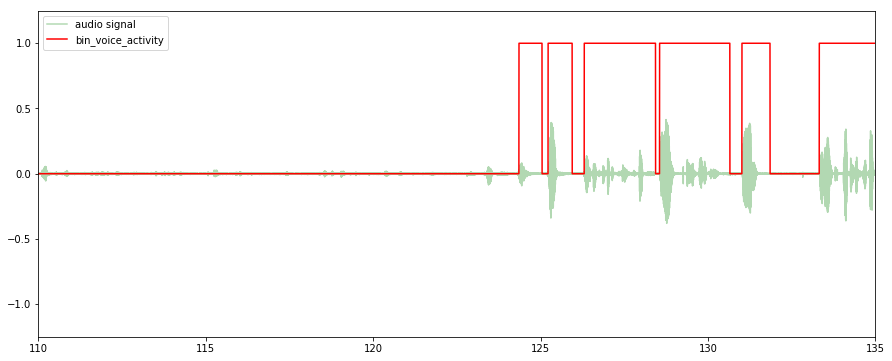

sessid_01_P2_sid_02
	Sampling rate: 8000


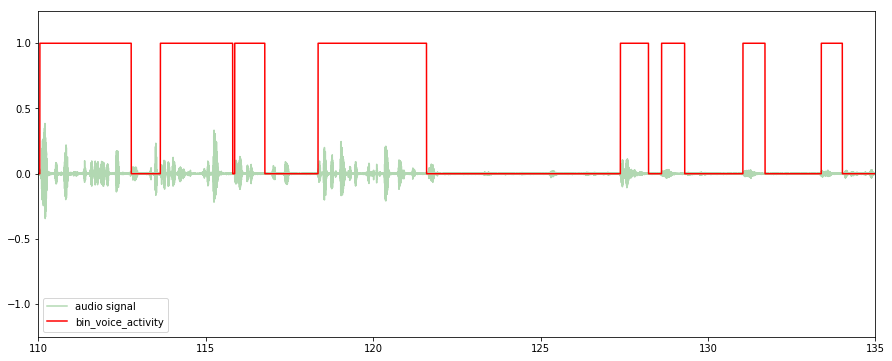

sessid_02_P1_sid_09
	Sampling rate: 8000


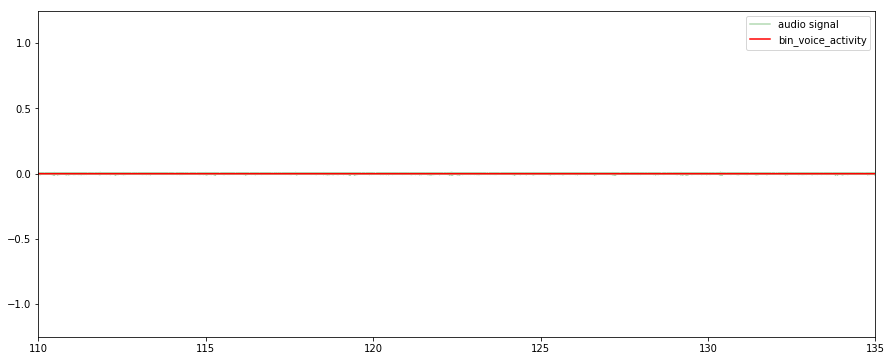

sessid_02_P2_sid_17
	Sampling rate: 8000


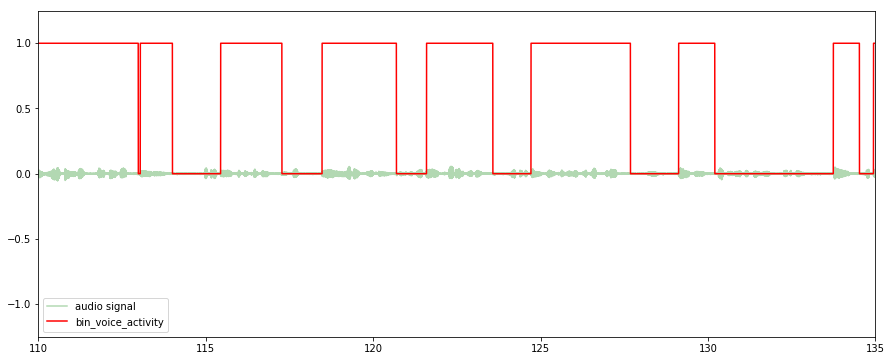

sessid_03_P1_sid_17
	Sampling rate: 8000


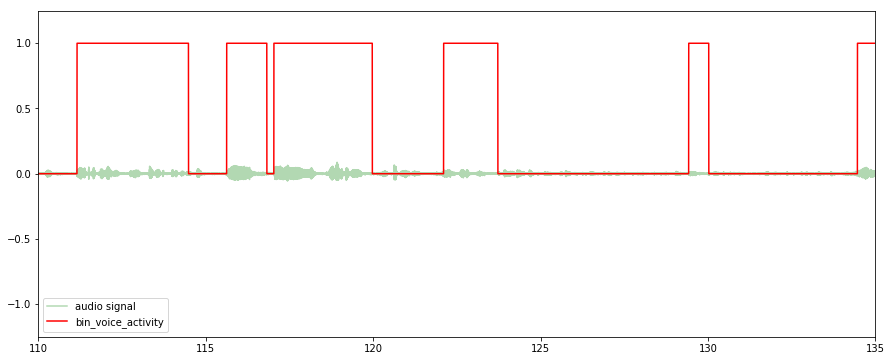

sessid_03_P2_sid_02
	Sampling rate: 8000


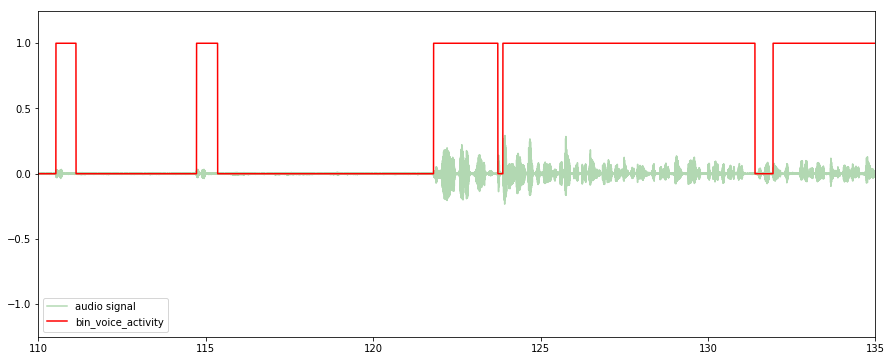

sessid_04_P1_sid_12
	Sampling rate: 8000


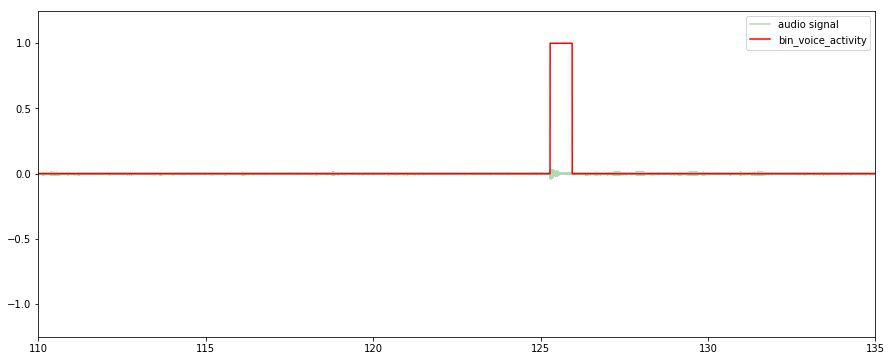

sessid_04_P2_sid_23
	Sampling rate: 8000


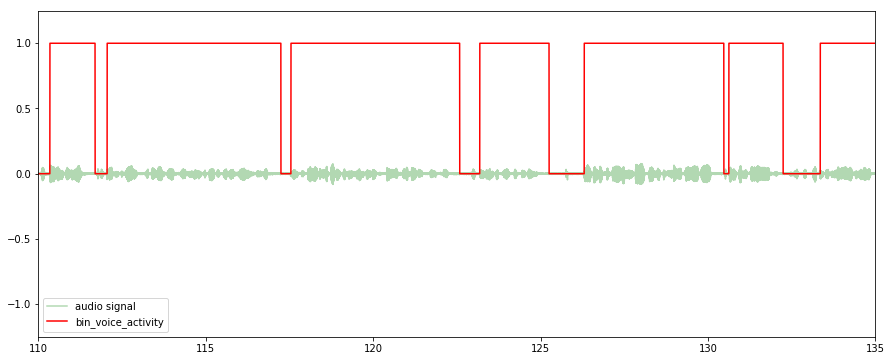

sessid_05_P1_sid_12
	Sampling rate: 8000


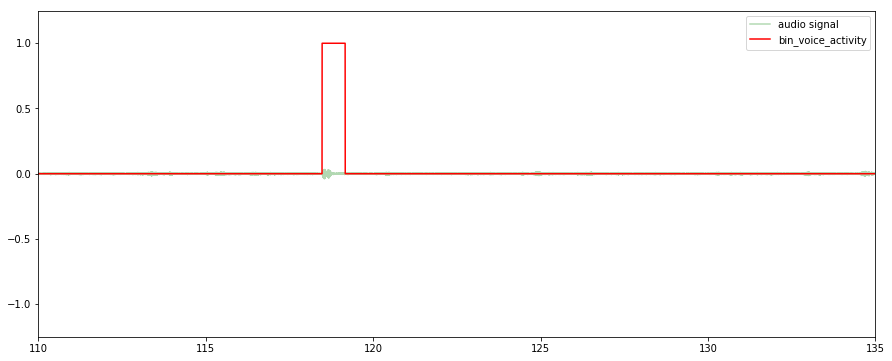

sessid_05_P2_sid_21
	Sampling rate: 8000


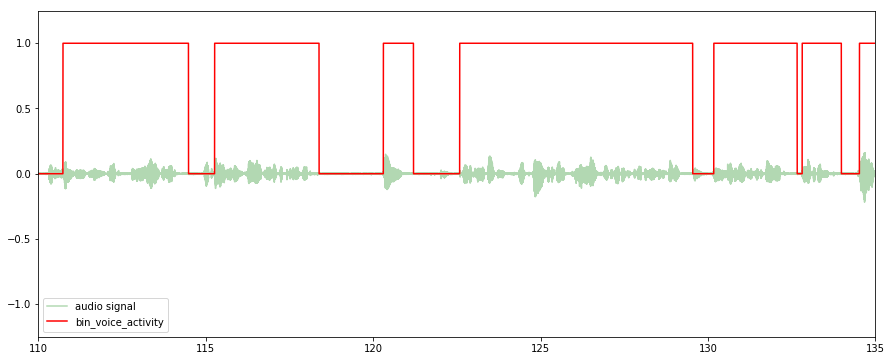

sessid_06_P1_sid_23
	Sampling rate: 8000


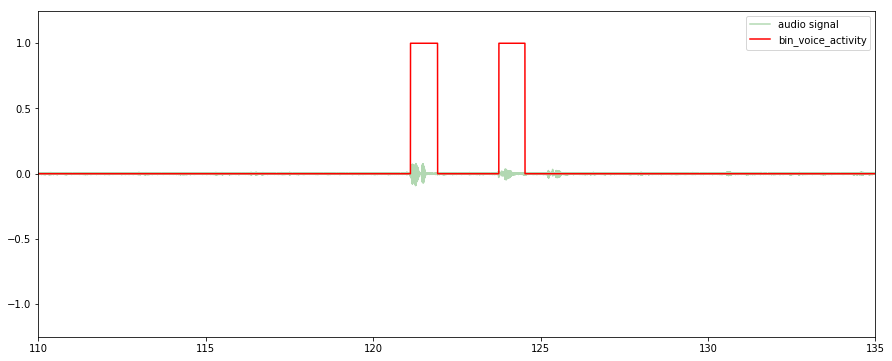

sessid_06_P2_sid_21
	Sampling rate: 8000


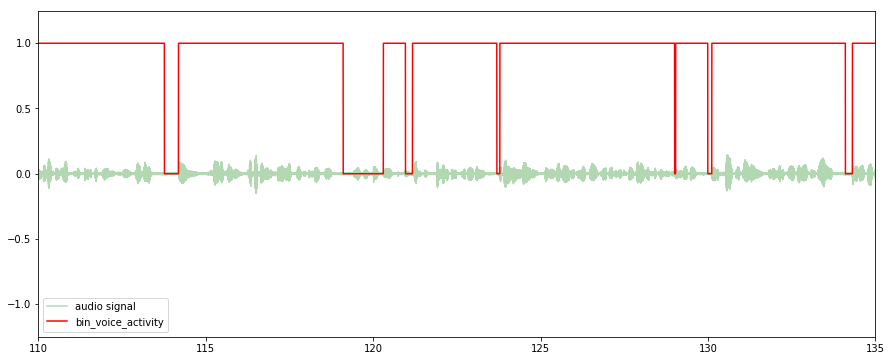

sessid_07_P1_sid_09
	Sampling rate: 8000


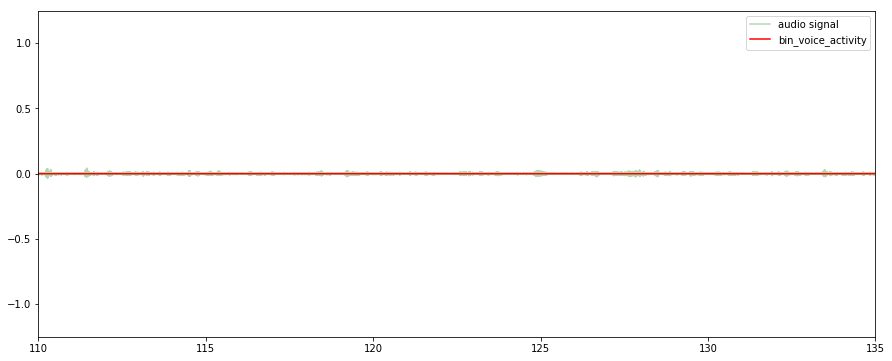

sessid_07_P2_sid_01
	Sampling rate: 8000


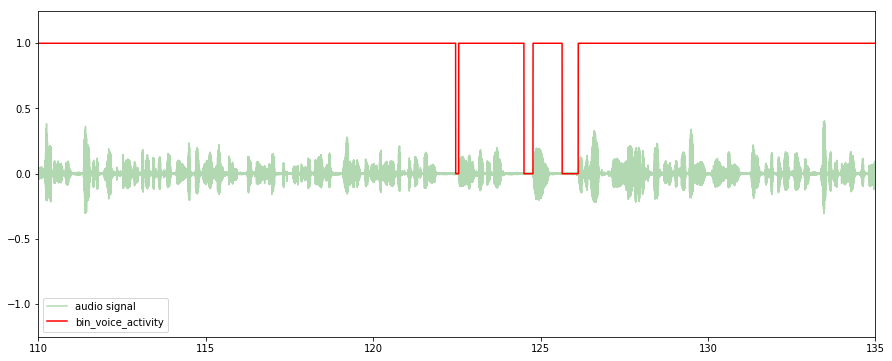

sessid_08_P1_sid_09
	Sampling rate: 8000


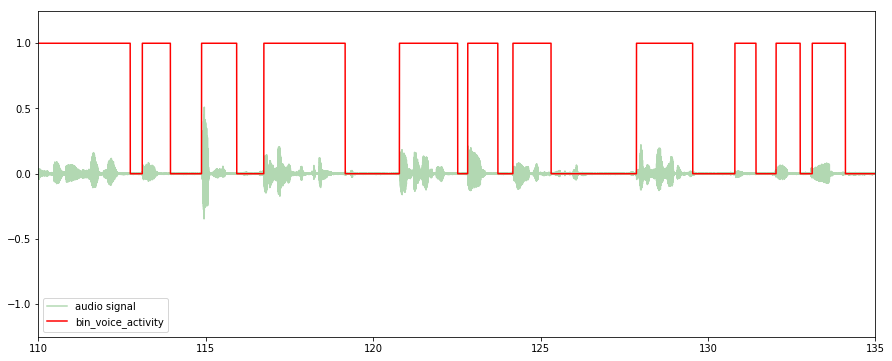

sessid_08_P2_sid_04
	Sampling rate: 8000


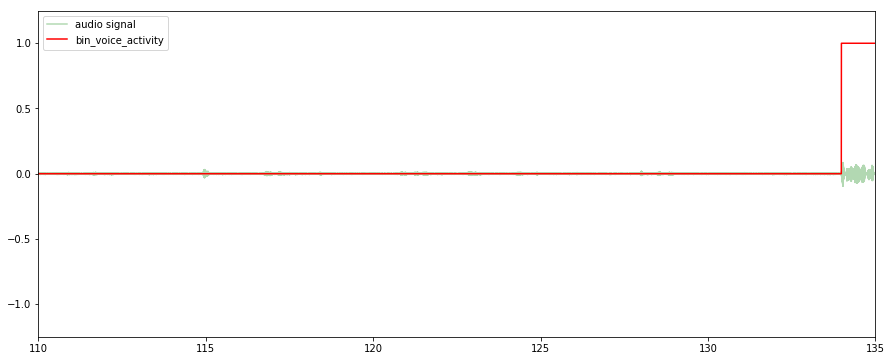

sessid_09_P1_sid_01
	Sampling rate: 8000


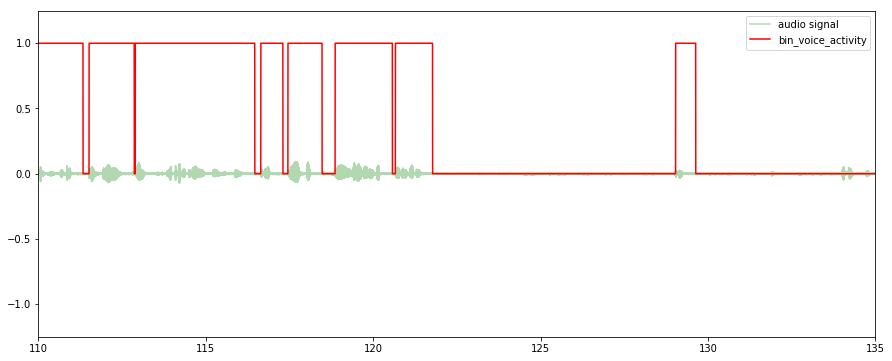

sessid_09_P2_sid_04
	Sampling rate: 8000


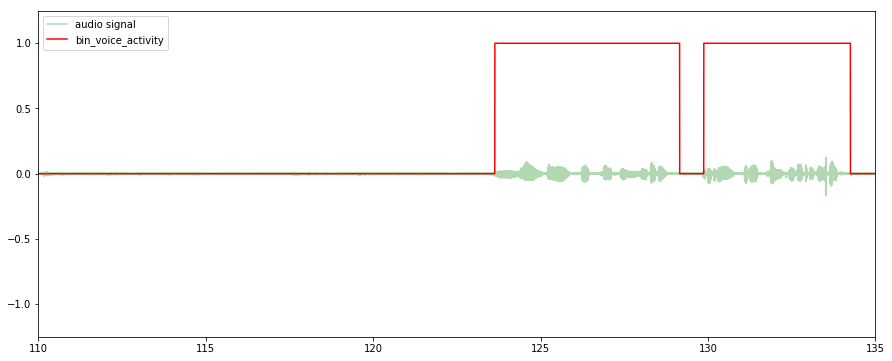

sessid_10_P1_sid_09
	Sampling rate: 8000


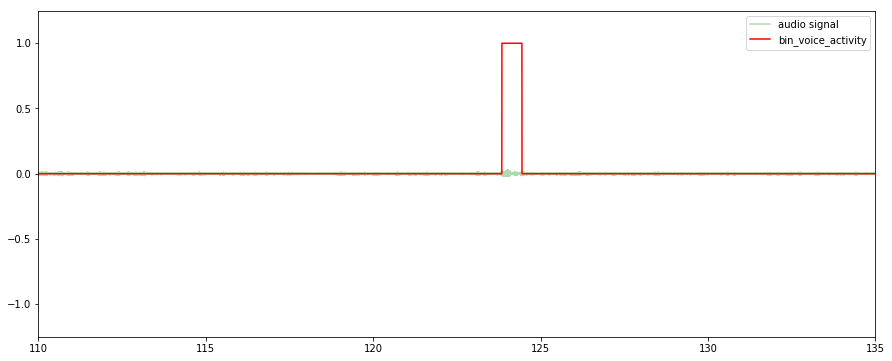

sessid_10_P2_sid_34
	Sampling rate: 8000


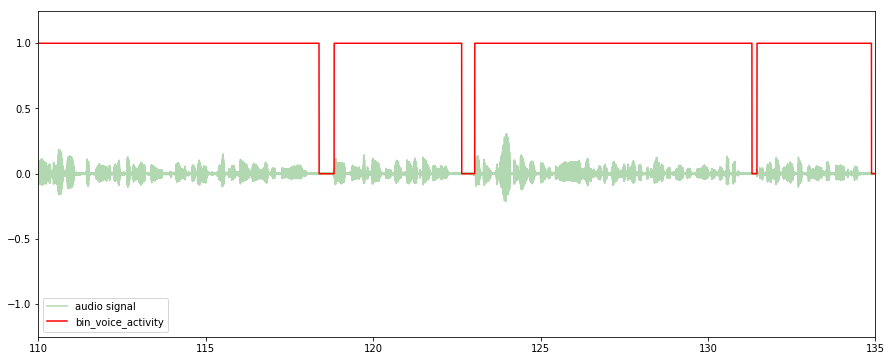

sessid_11_P1_sid_09
	Sampling rate: 8000


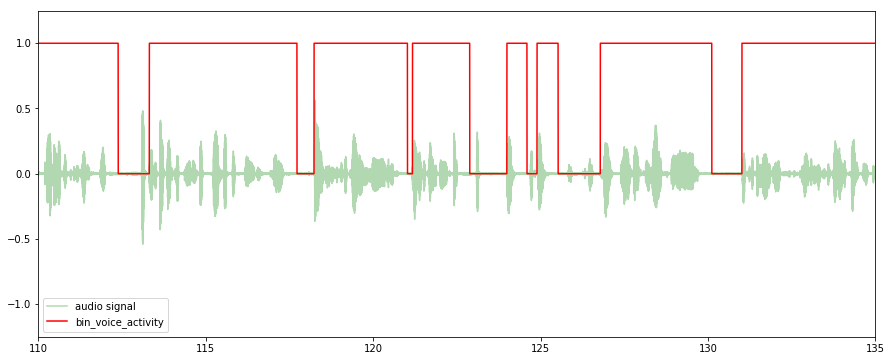

sessid_11_P2_sid_15
	Sampling rate: 8000


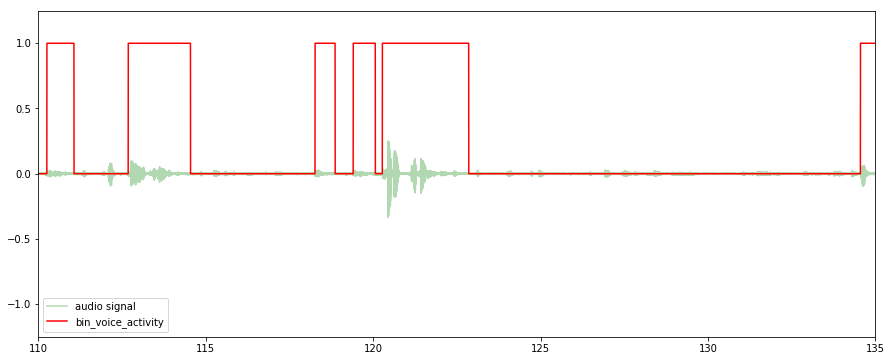

sessid_12_P1_sid_15
	Sampling rate: 8000


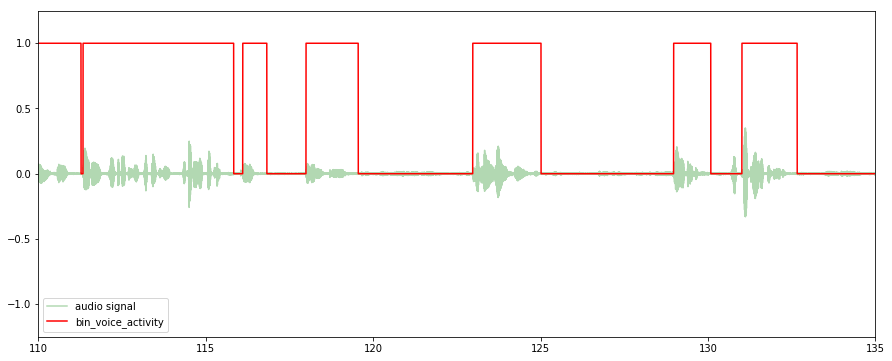

sessid_12_P2_sid_11
	Sampling rate: 8000


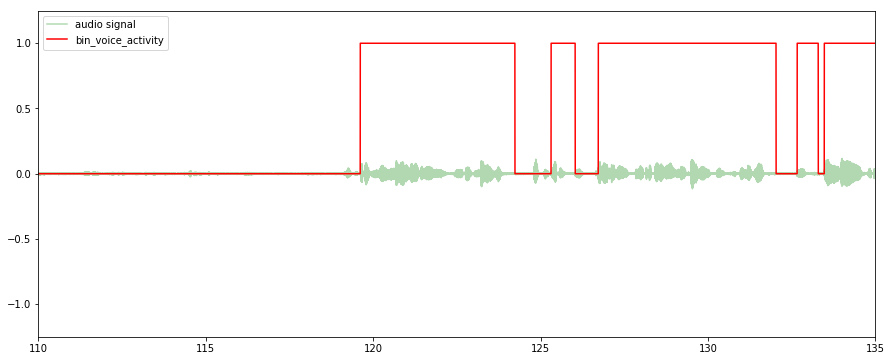

sessid_13_P1_sid_09
	Sampling rate: 8000


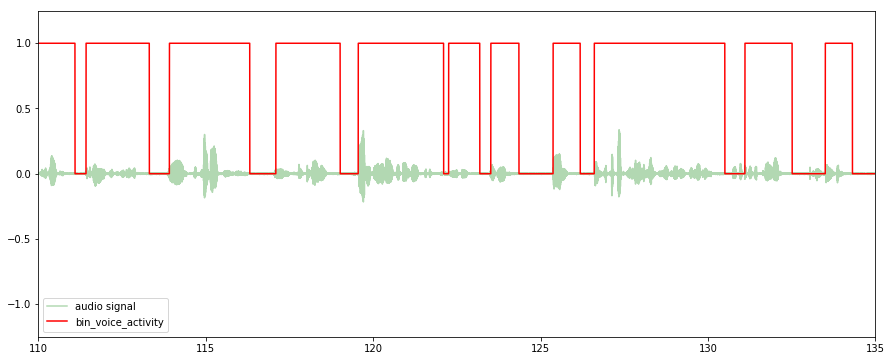

sessid_13_P2_sid_19
	Sampling rate: 8000


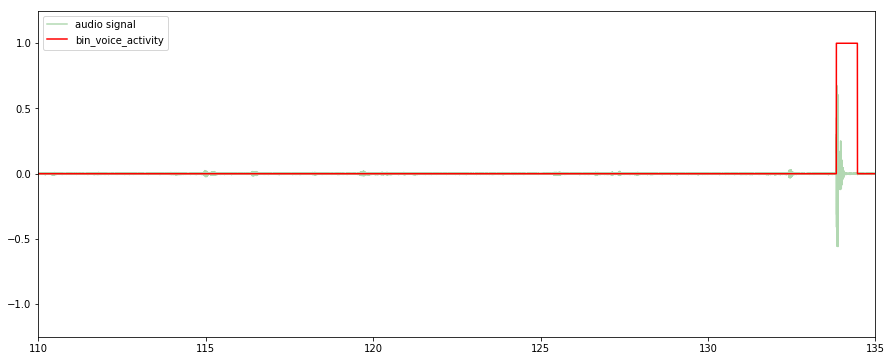

sessid_14_P1_sid_19
	Sampling rate: 8000


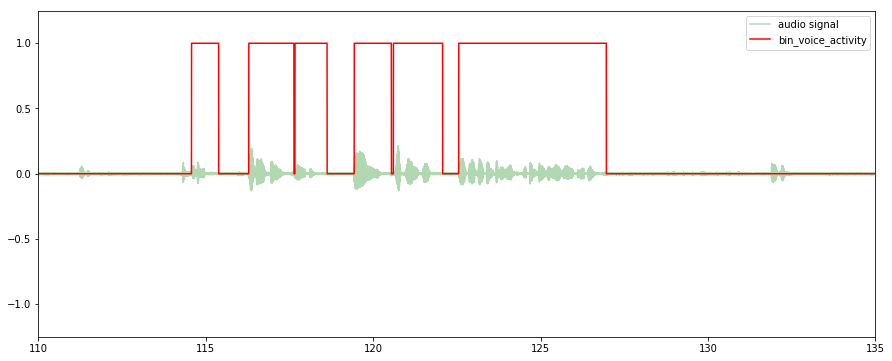

sessid_14_P2_sid_06
	Sampling rate: 8000


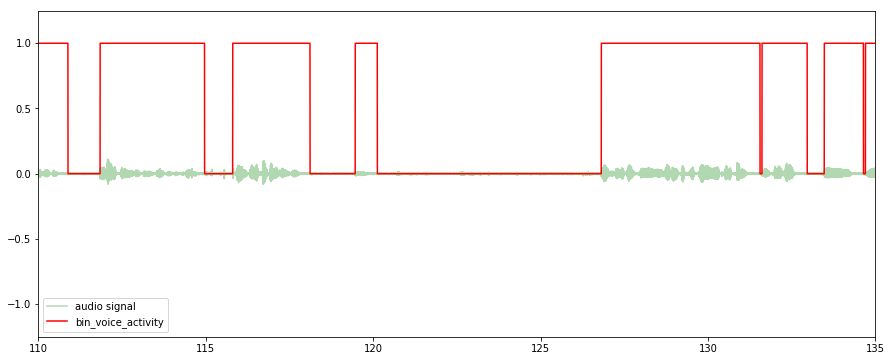

sessid_15_P1_sid_09
	Sampling rate: 8000


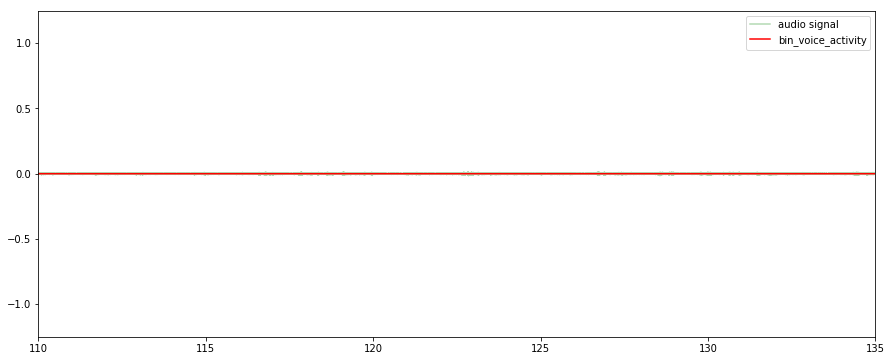

sessid_15_P2_sid_16
	Sampling rate: 8000


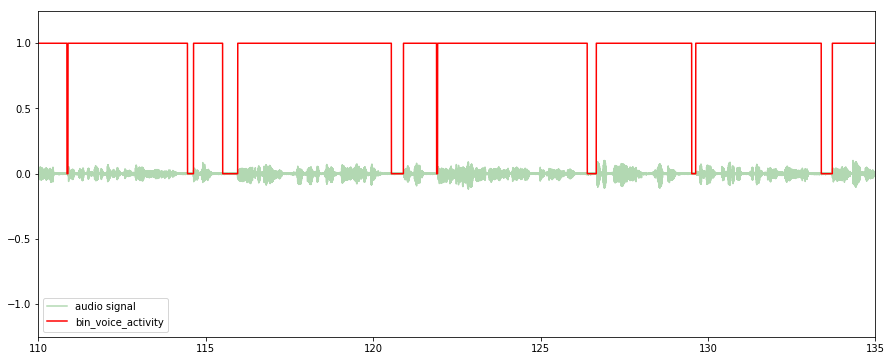

sessid_16_P1_sid_24
	Sampling rate: 8000


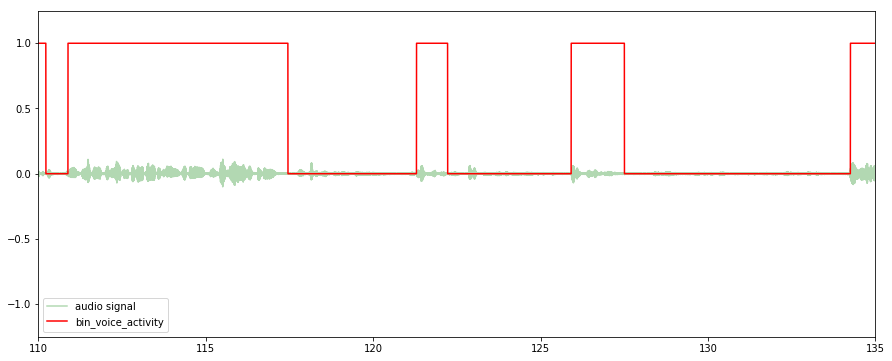

sessid_16_P2_sid_16
	Sampling rate: 8000


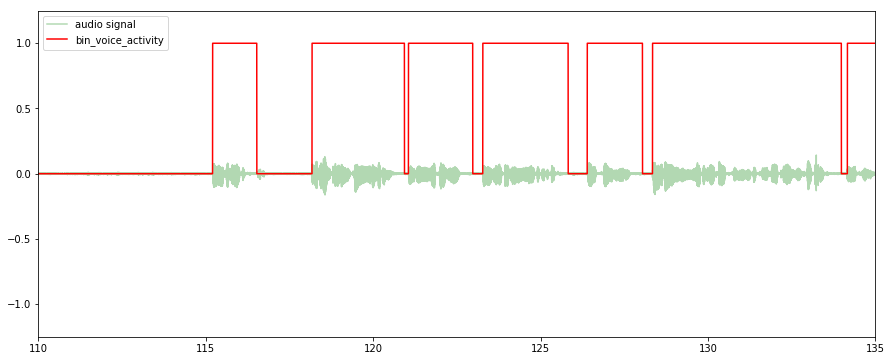

sessid_17_P1_sid_09
	Sampling rate: 8000


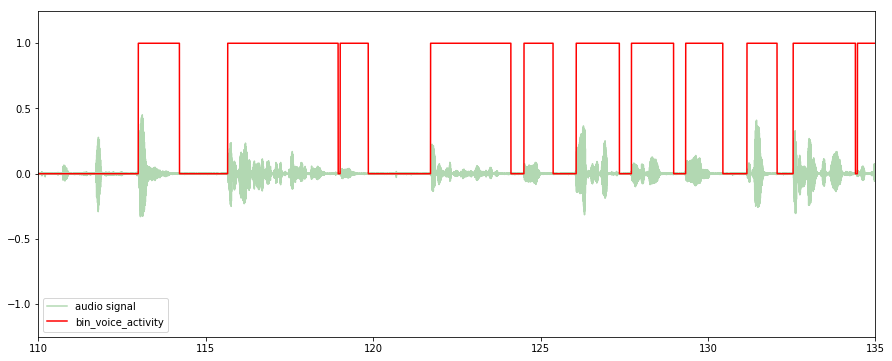

sessid_17_P2_sid_43
	Sampling rate: 8000


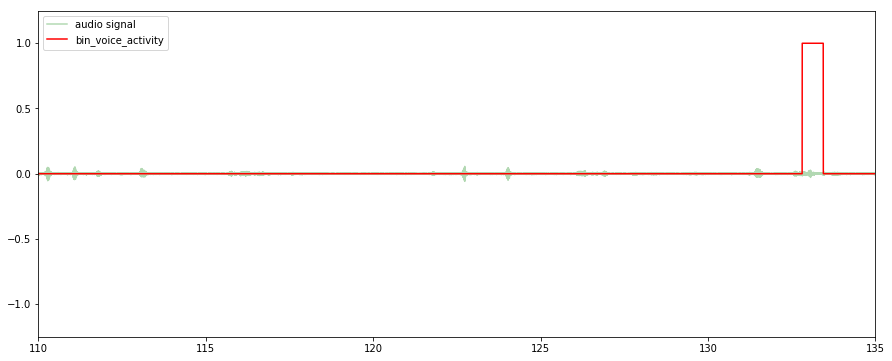

sessid_18_P1_sid_03
	Sampling rate: 8000


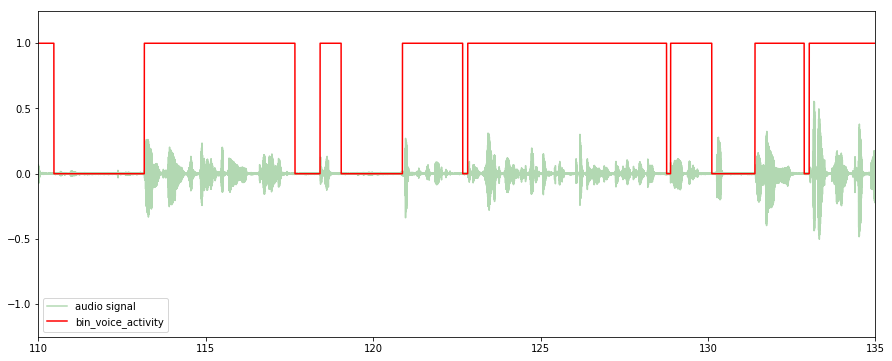

sessid_18_P2_sid_43
	Sampling rate: 8000


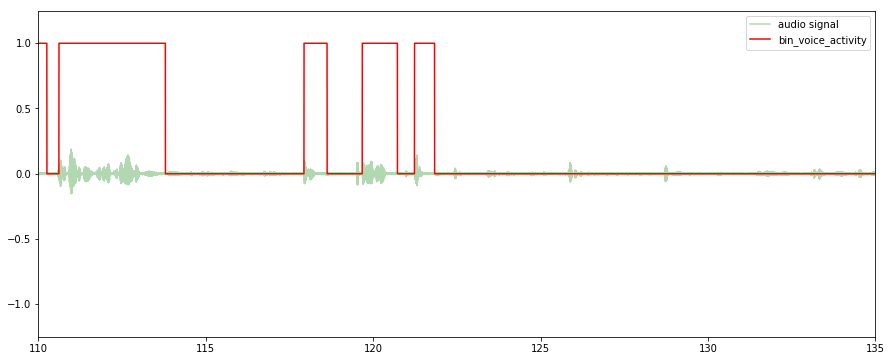

sessid_19_P1_sid_09
	Sampling rate: 8000


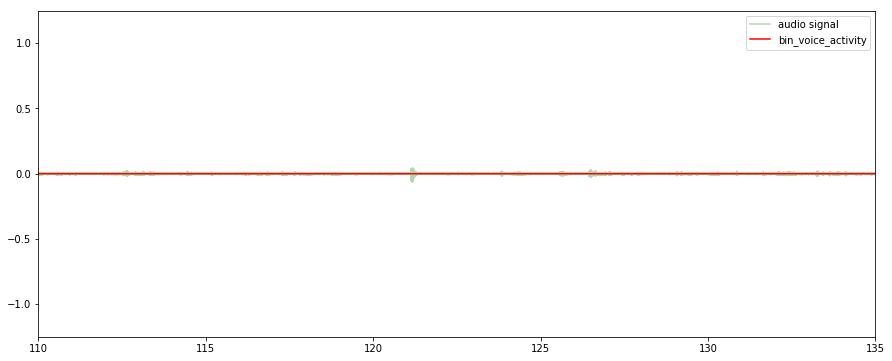

sessid_19_P2_sid_22
	Sampling rate: 8000


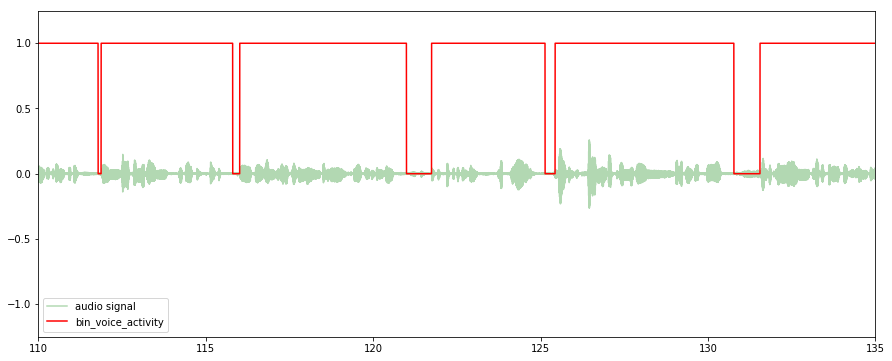

sessid_20_P1_sid_09
	Sampling rate: 8000


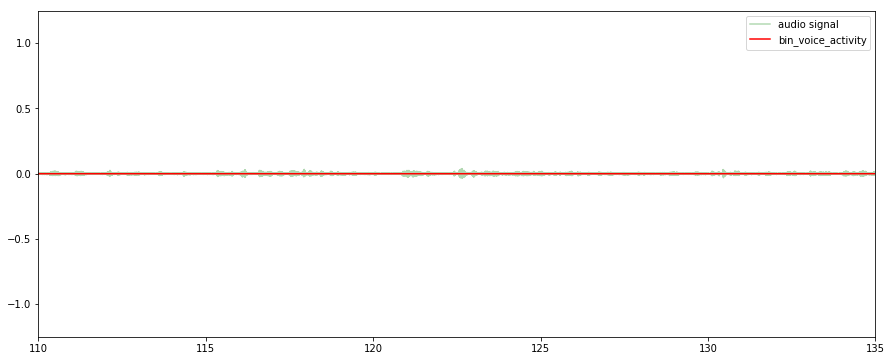

sessid_20_P2_sid_50
	Sampling rate: 8000


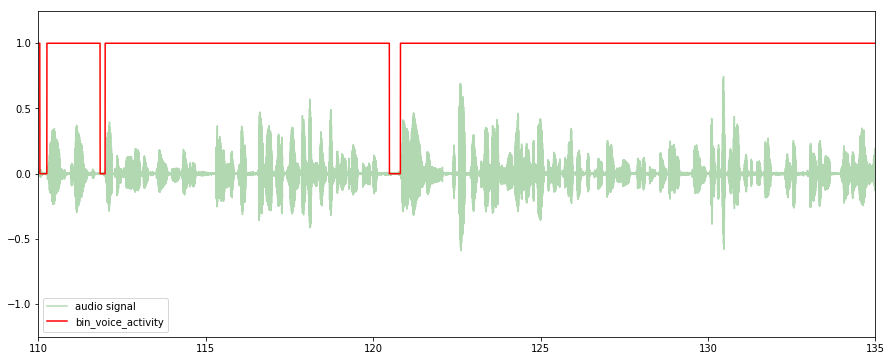

sessid_21_P1_sid_50
	Sampling rate: 8000


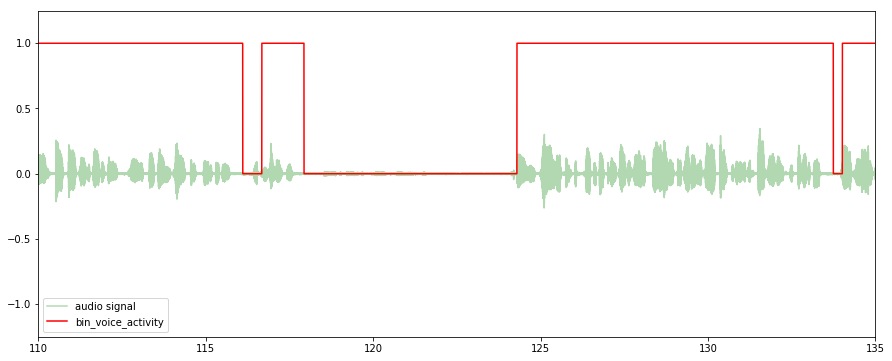

sessid_21_P2_sid_22
	Sampling rate: 8000


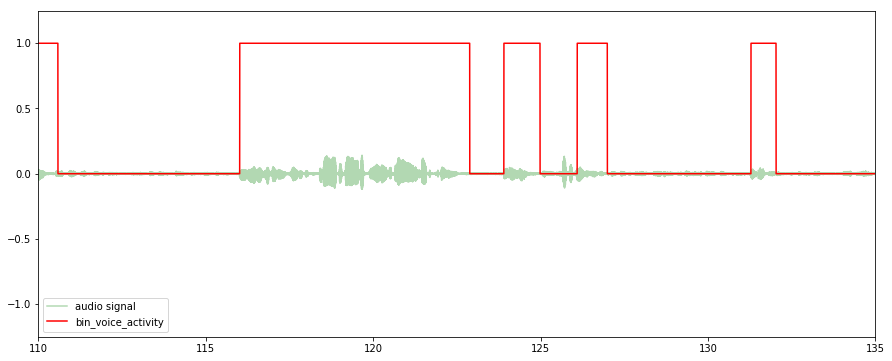

sessid_22_P1_sid_12
	Sampling rate: 8000


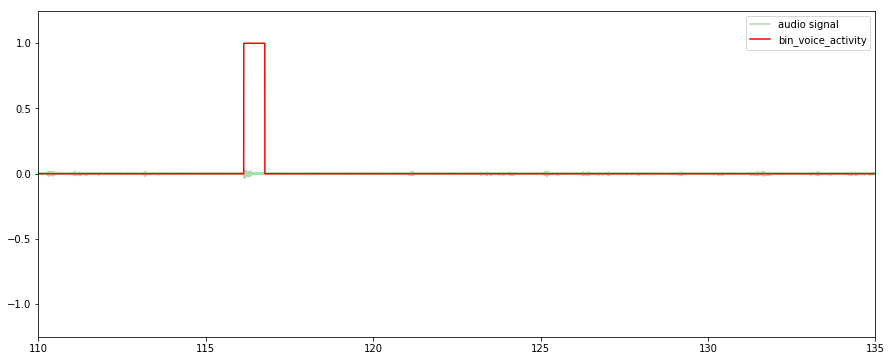

sessid_22_P2_sid_18
	Sampling rate: 8000


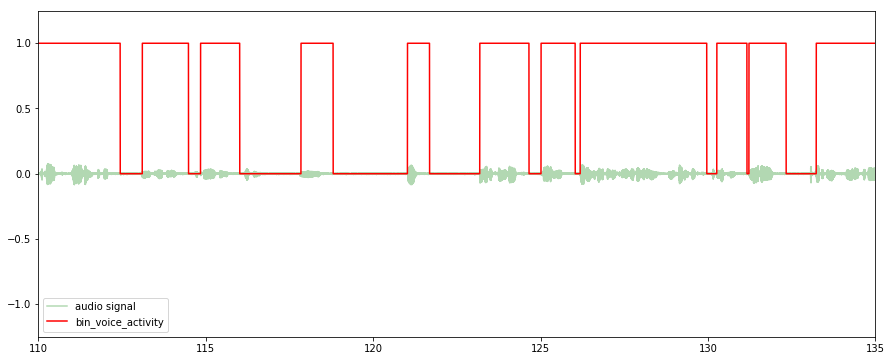

sessid_23_P1_sid_12
	Sampling rate: 8000


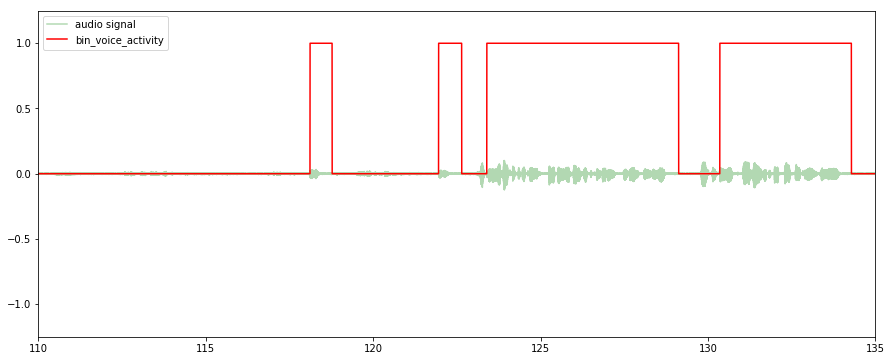

sessid_23_P2_sid_39
	Sampling rate: 8000


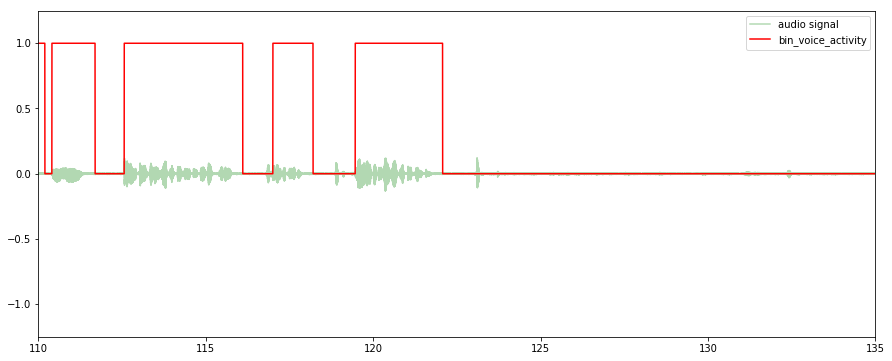

sessid_24_P1_sid_18
	Sampling rate: 8000


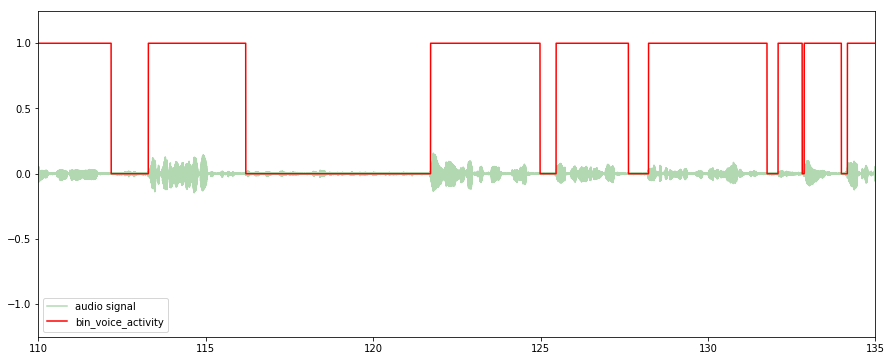

sessid_24_P2_sid_39
	Sampling rate: 8000


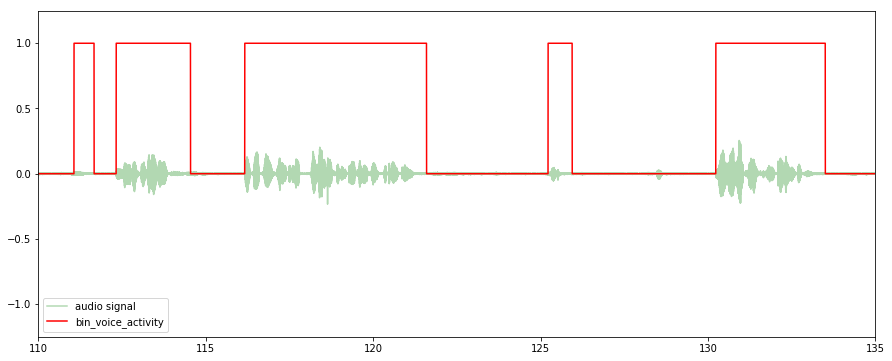

sessid_25_P1_sid_12
	Sampling rate: 8000


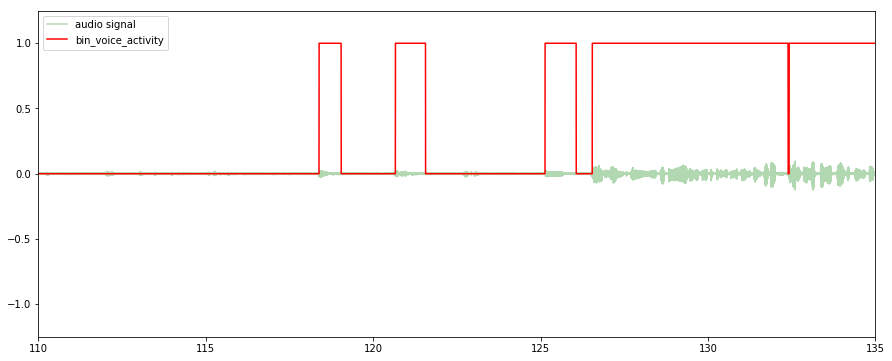

sessid_25_P2_sid_27
	Sampling rate: 8000


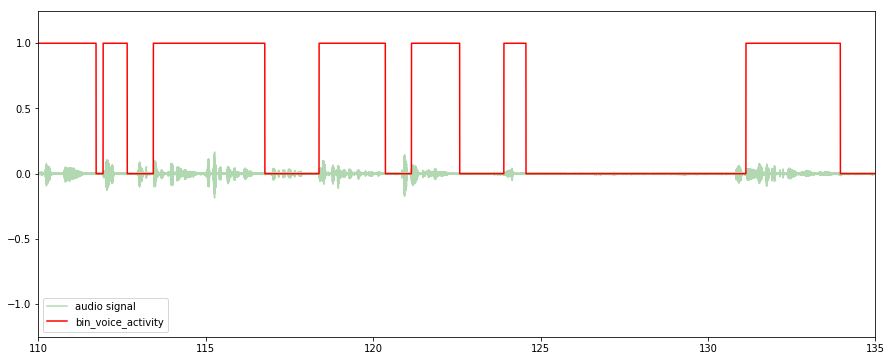

sessid_26_P1_sid_12
	Sampling rate: 8000


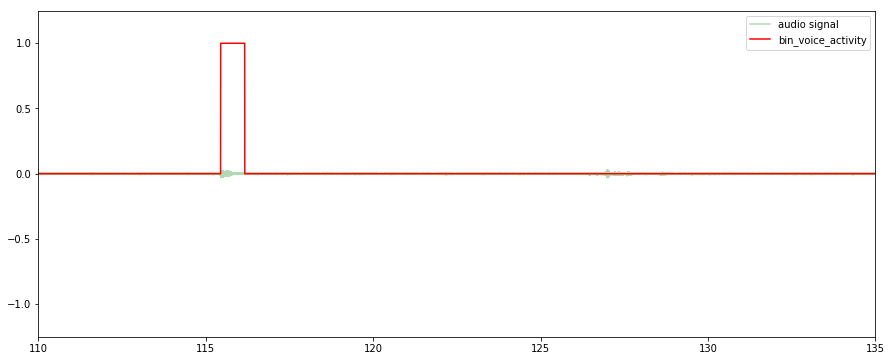

sessid_26_P2_sid_32
	Sampling rate: 8000


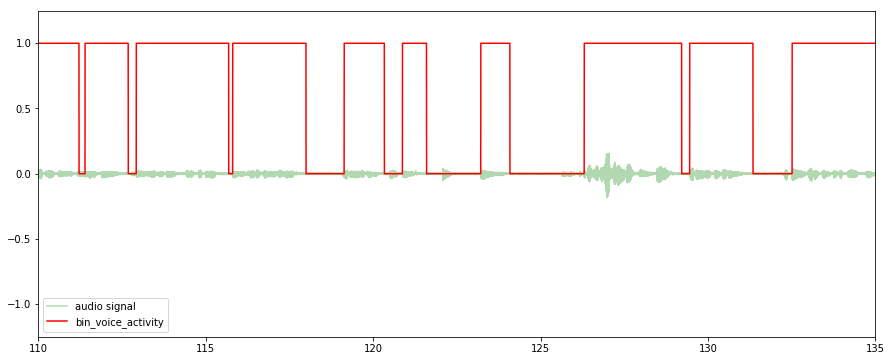

sessid_27_P1_sid_27
	Sampling rate: 8000


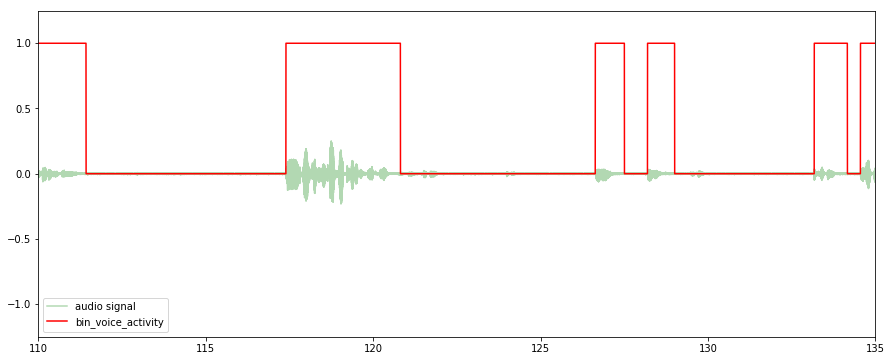

sessid_27_P2_sid_32
	Sampling rate: 8000


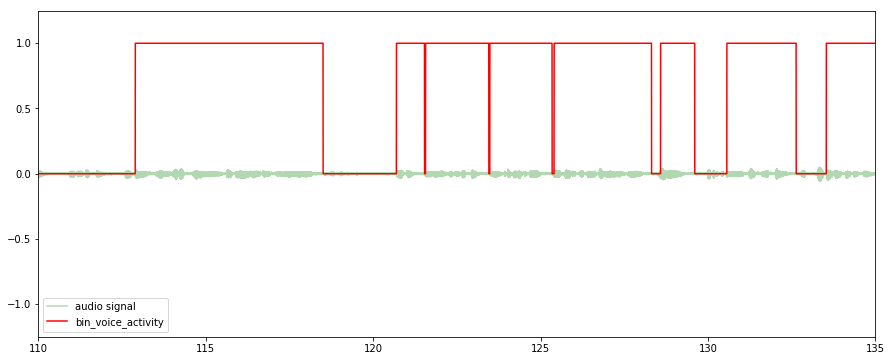

sessid_28_P1_sid_09
	Sampling rate: 8000


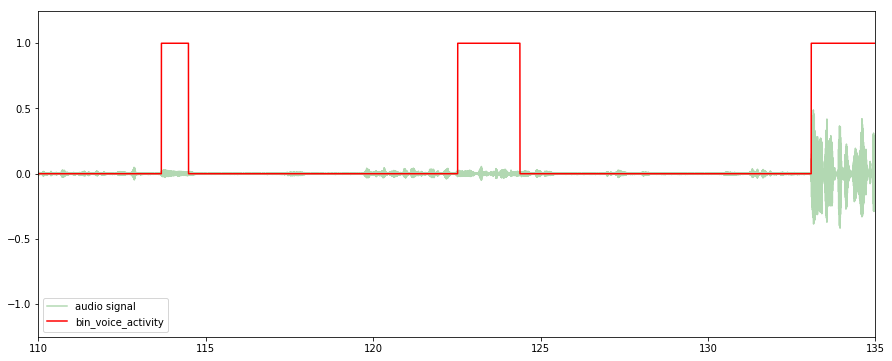

sessid_28_P2_sid_07
	Sampling rate: 8000


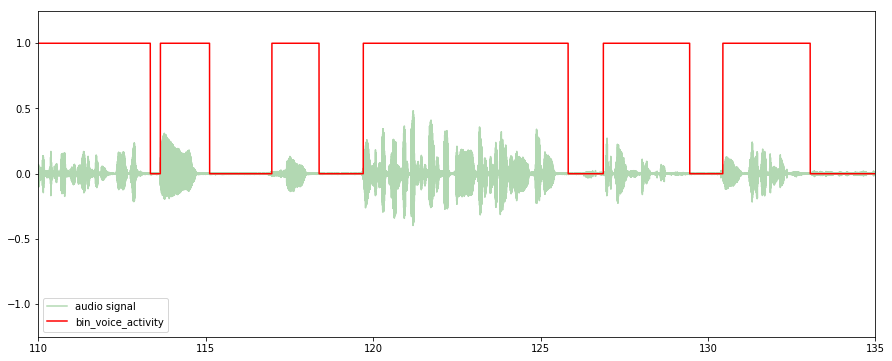

sessid_29_P1_sid_09
	Sampling rate: 8000


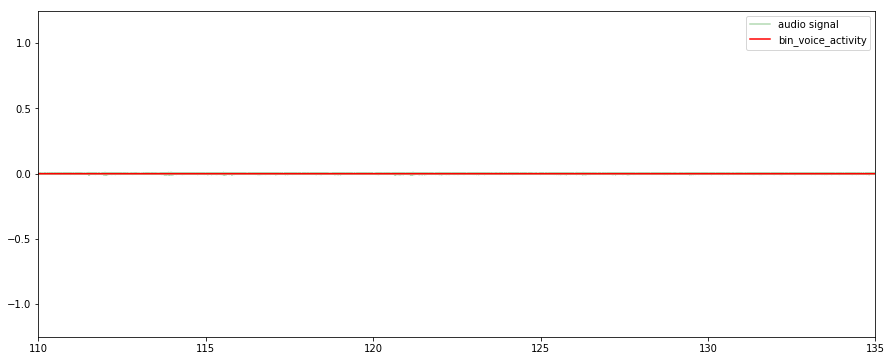

sessid_29_P2_sid_05
	Sampling rate: 8000


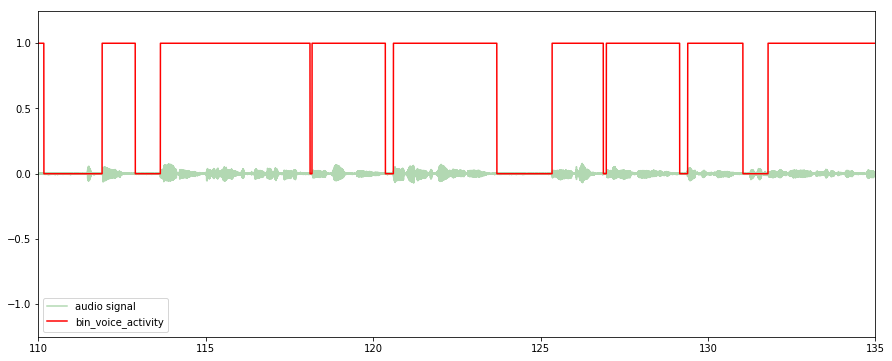

sessid_30_P1_sid_07
	Sampling rate: 8000


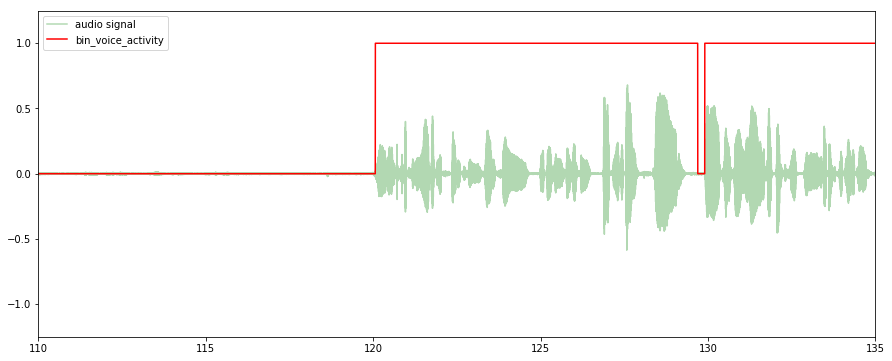

sessid_30_P2_sid_05
	Sampling rate: 8000


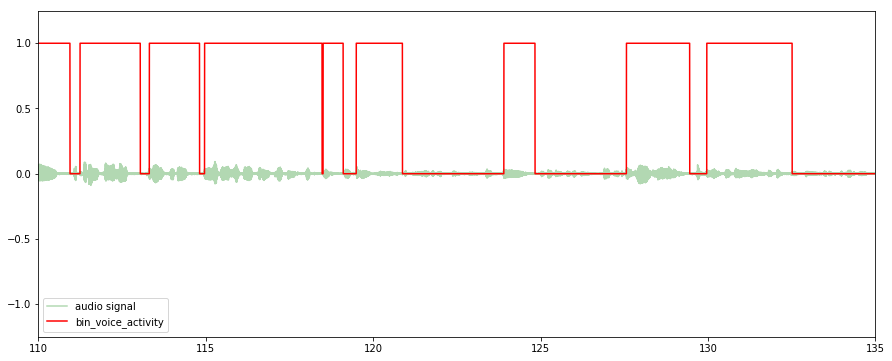

sessid_31_P1_sid_28
	Sampling rate: 8000


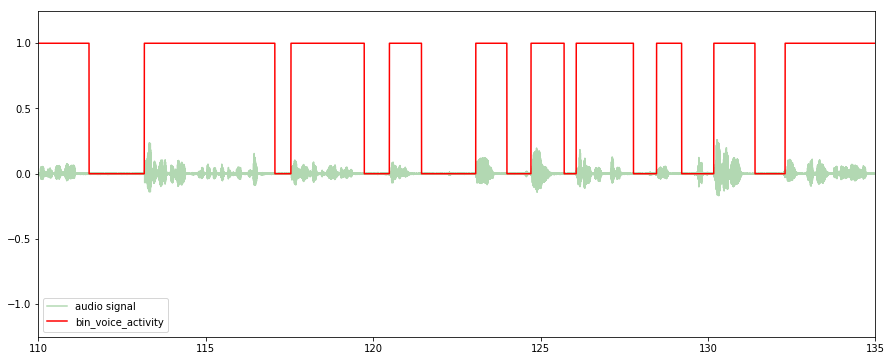

sessid_31_P2_sid_09
	Sampling rate: 8000


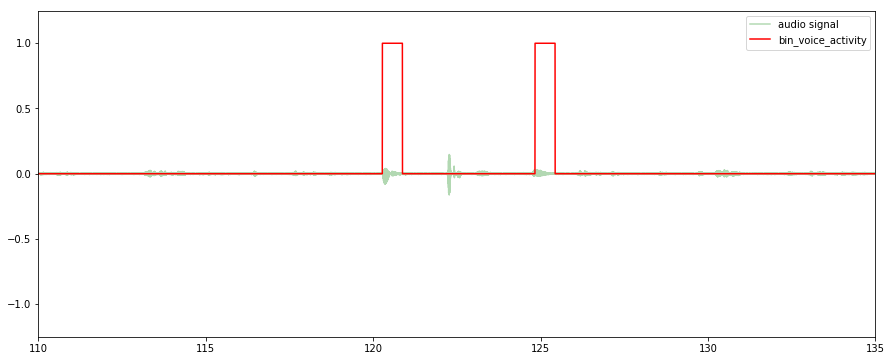

sessid_32_P1_sid_28
	Sampling rate: 8000


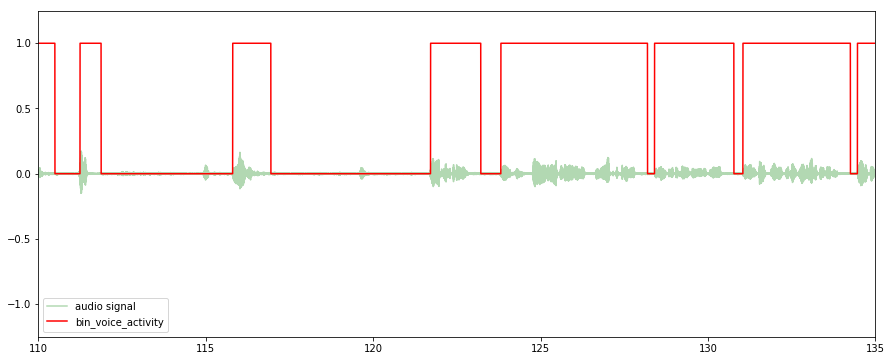

sessid_32_P2_sid_14
	Sampling rate: 8000


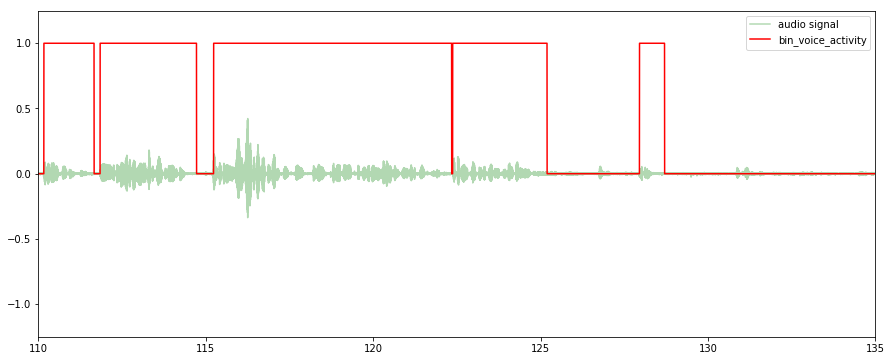

sessid_33_P1_sid_09
	Sampling rate: 8000


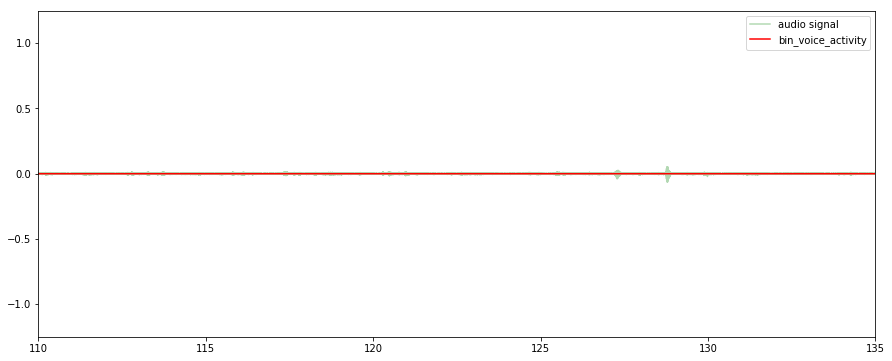

sessid_33_P2_sid_33
	Sampling rate: 8000


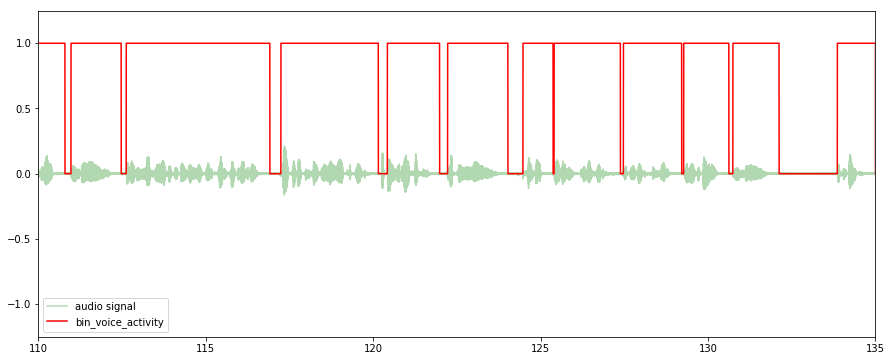

sessid_34_P1_sid_09
	Sampling rate: 8000


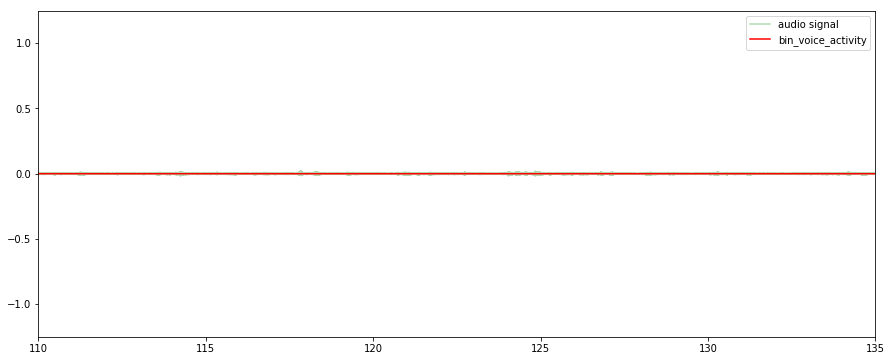

sessid_34_P2_sid_36
	Sampling rate: 8000


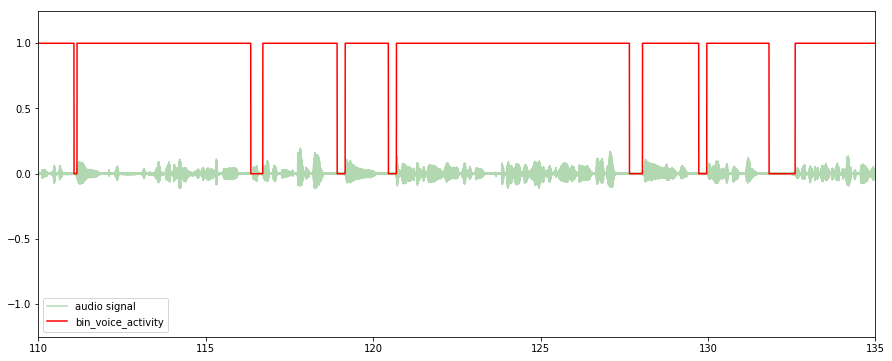

sessid_35_P1_sid_33
	Sampling rate: 8000


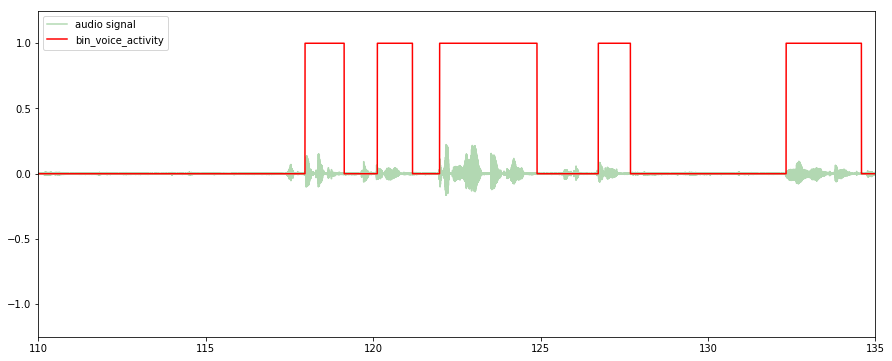

sessid_35_P2_sid_36
	Sampling rate: 8000


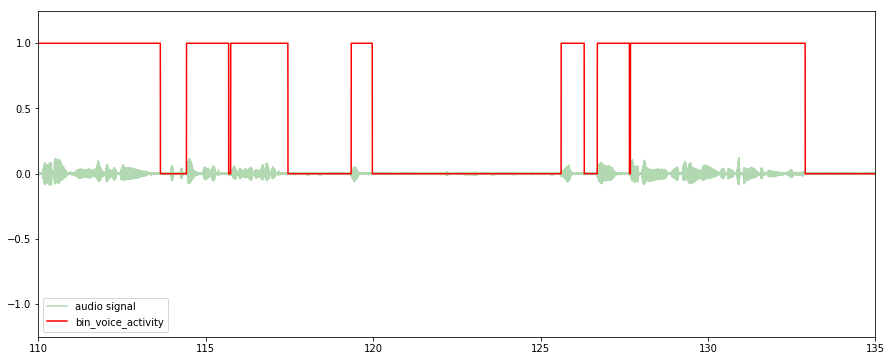

sessid_36_P1_sid_13
	Sampling rate: 8000


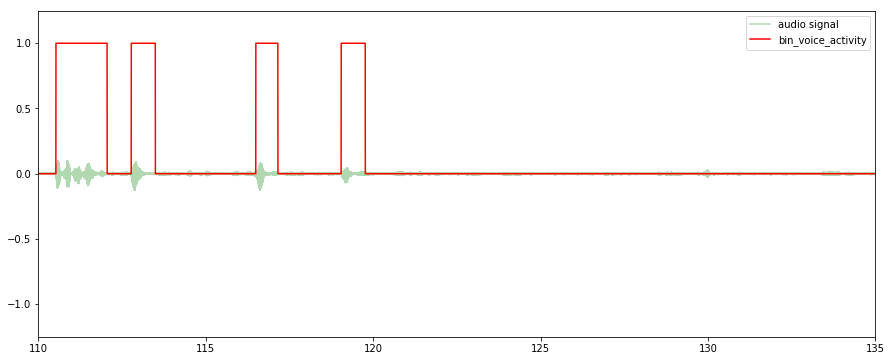

sessid_36_P2_sid_40
	Sampling rate: 8000


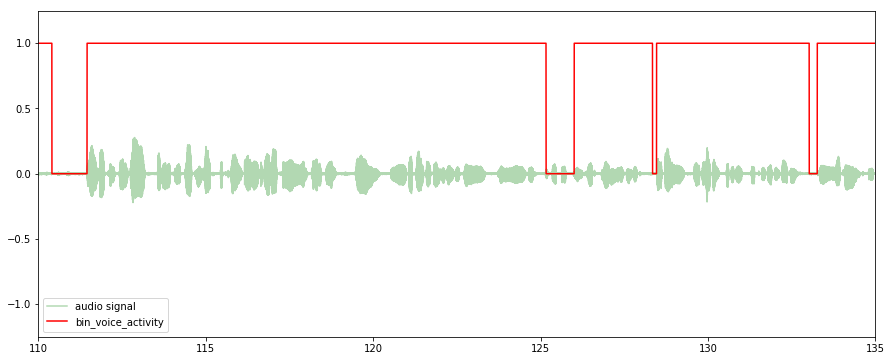

sessid_37_P1_sid_13
	Sampling rate: 8000


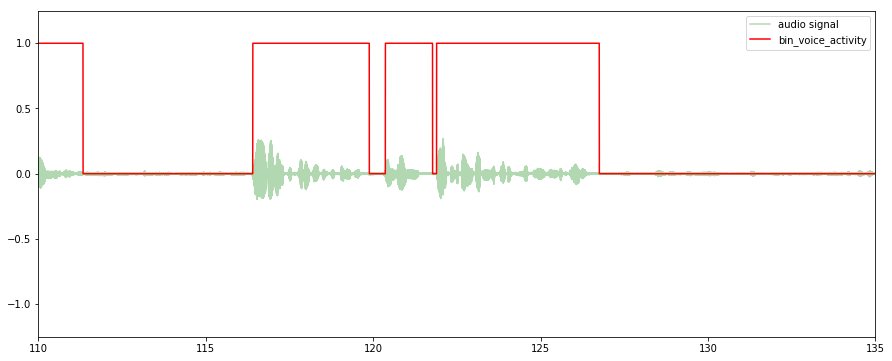

sessid_37_P2_sid_40
	Sampling rate: 8000


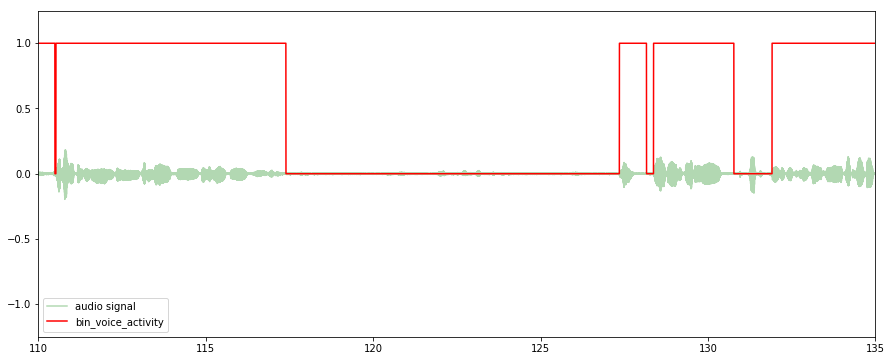

sessid_38_P1_sid_56
	Sampling rate: 8000


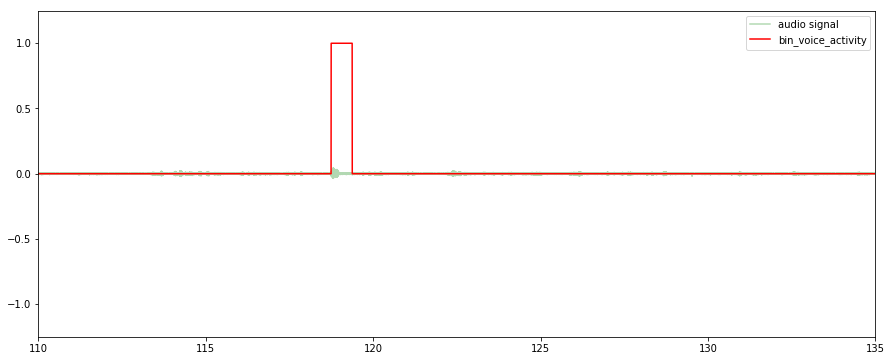

sessid_38_P2_sid_30
	Sampling rate: 8000


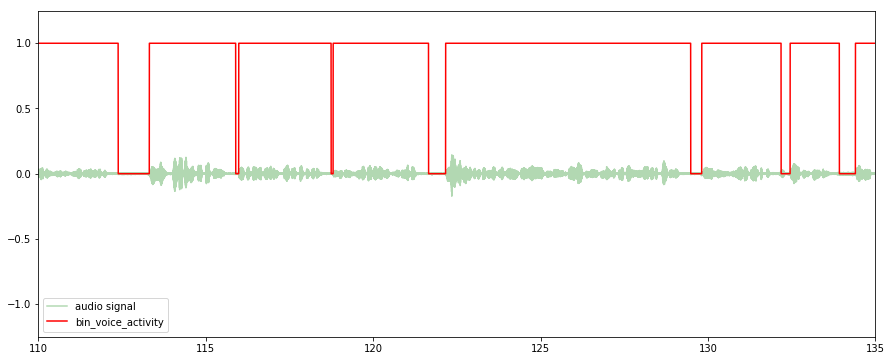

sessid_40_P1_sid_56
	Sampling rate: 8000


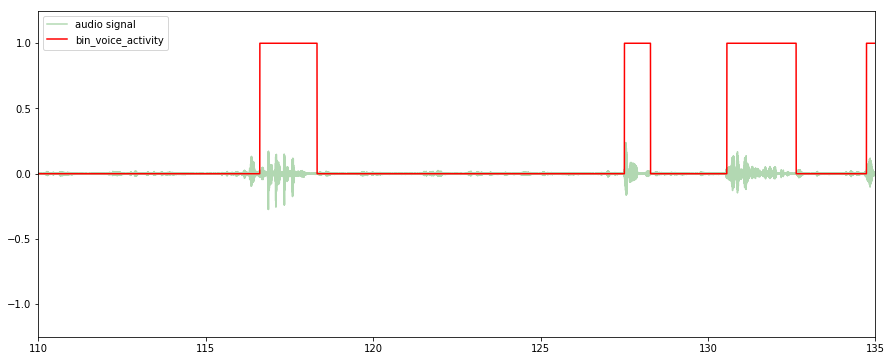

sessid_40_P2_sid_51
	Sampling rate: 8000


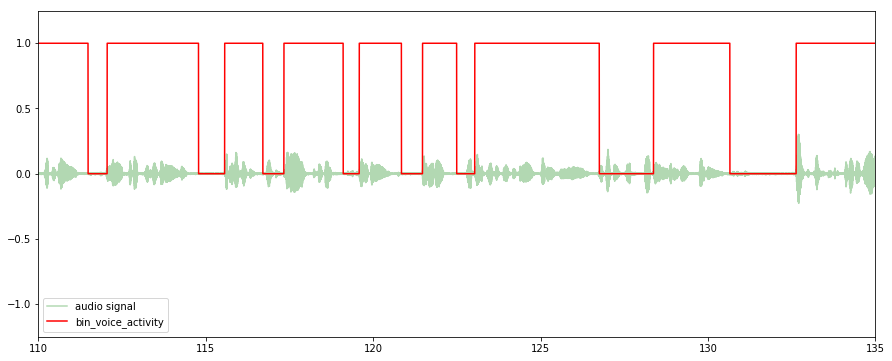

sessid_41_P1_sid_57
	Sampling rate: 8000


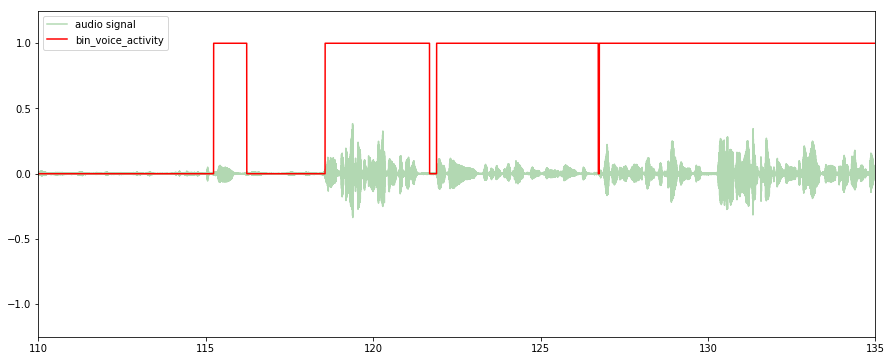

sessid_41_P2_sid_51
	Sampling rate: 8000


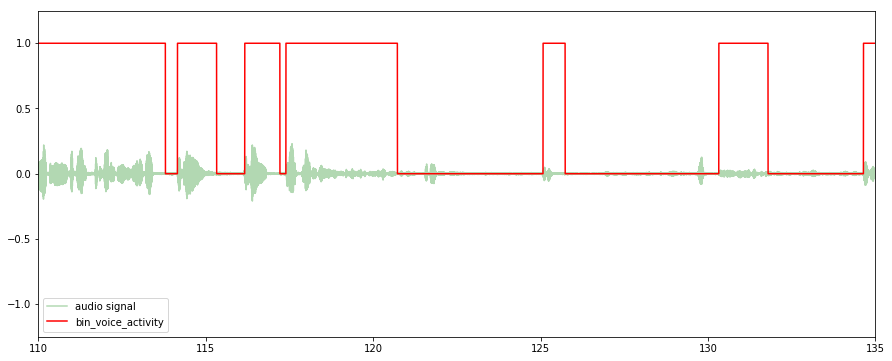

sessid_42_P1_sid_12
	Sampling rate: 8000


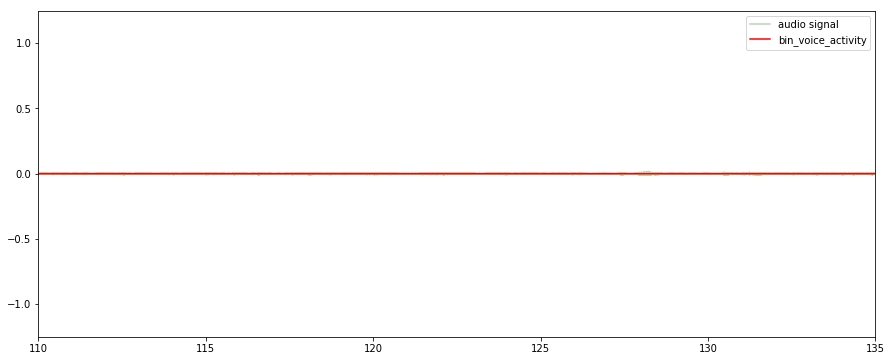

sessid_42_P2_sid_10
	Sampling rate: 8000


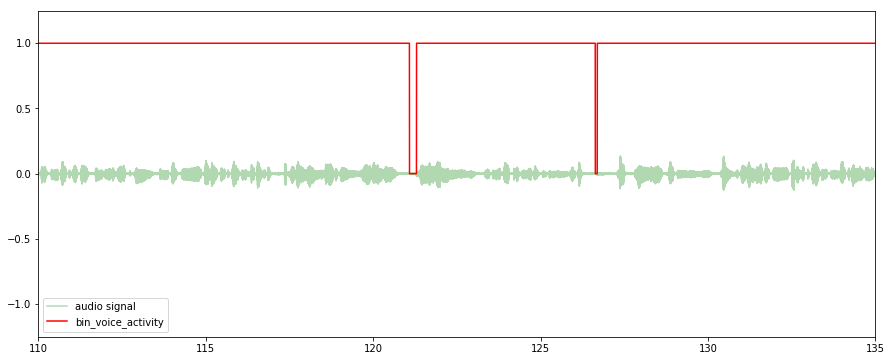

sessid_43_P1_sid_12
	Sampling rate: 8000


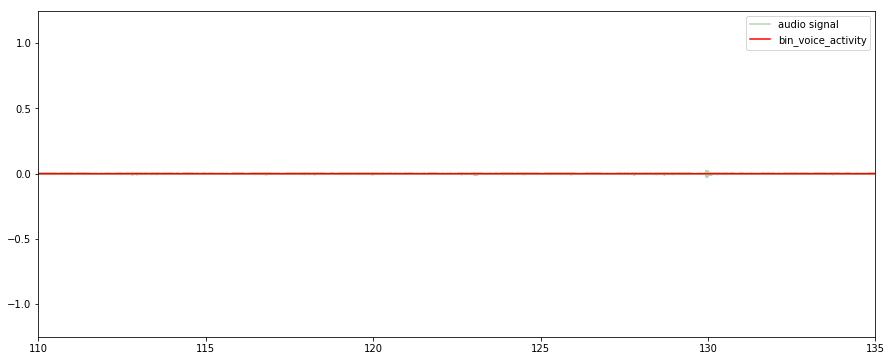

sessid_43_P2_sid_20
	Sampling rate: 8000


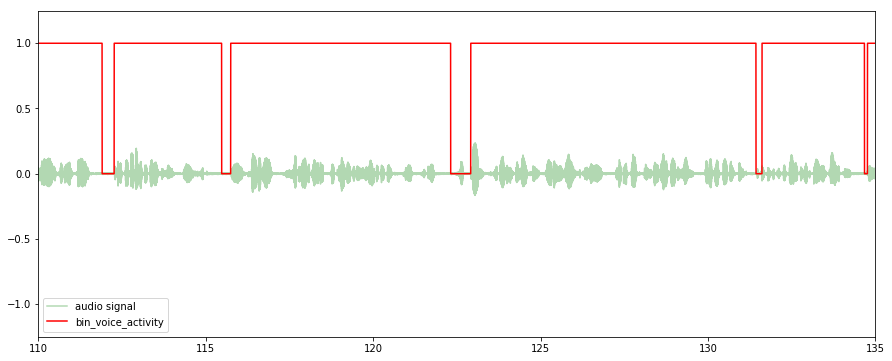

sessid_44_P1_sid_10
	Sampling rate: 8000


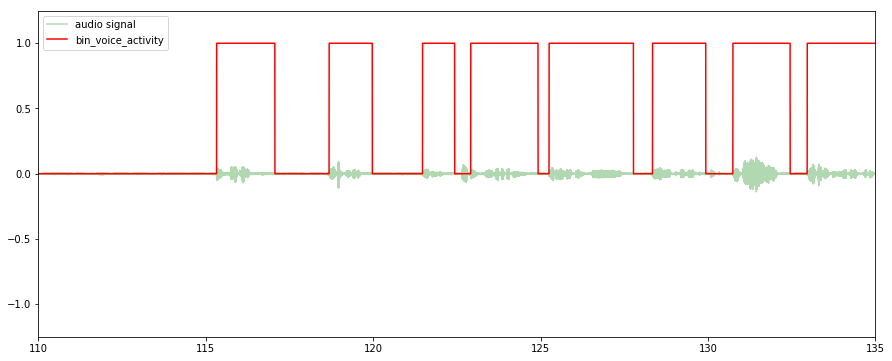

sessid_44_P2_sid_20
	Sampling rate: 8000


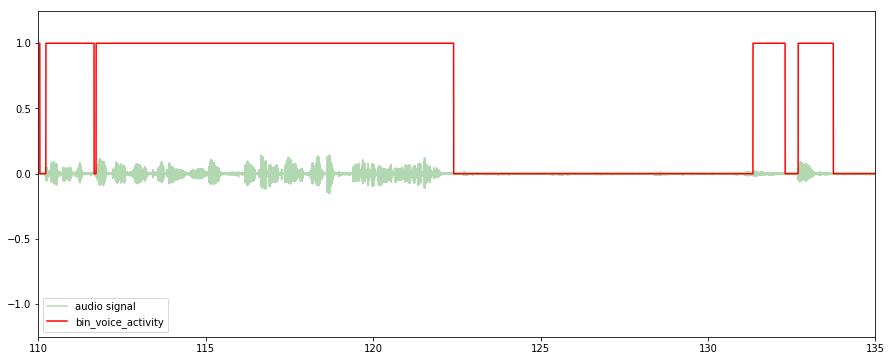

sessid_45_P1_sid_56
	Sampling rate: 8000


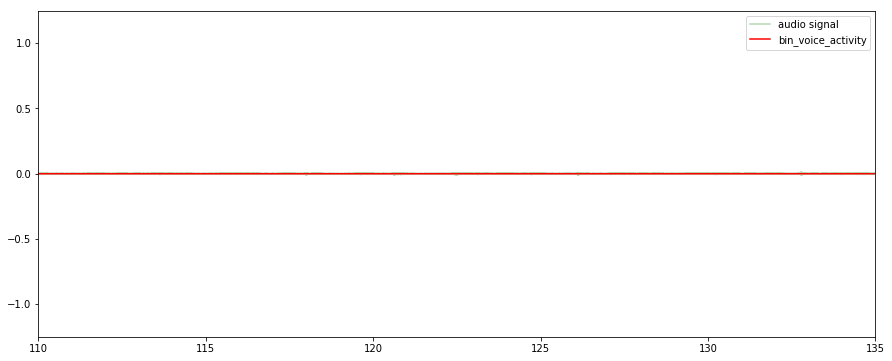

sessid_45_P2_sid_38
	Sampling rate: 8000


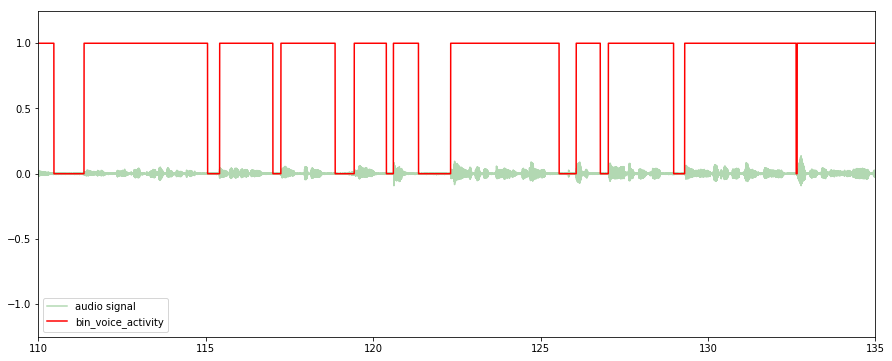

sessid_46_P1_sid_55
	Sampling rate: 8000


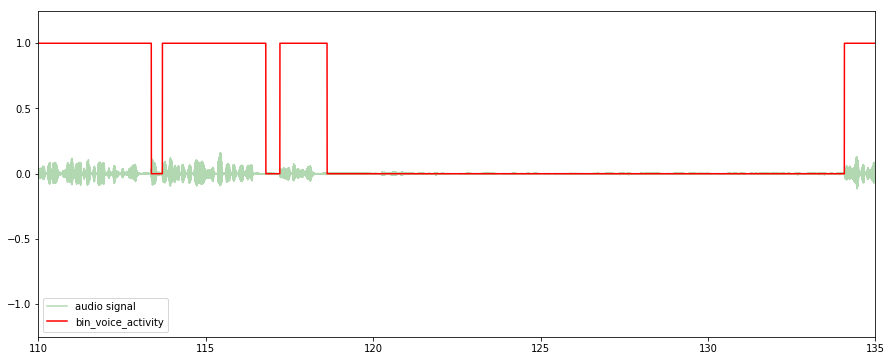

sessid_46_P2_sid_38
	Sampling rate: 8000


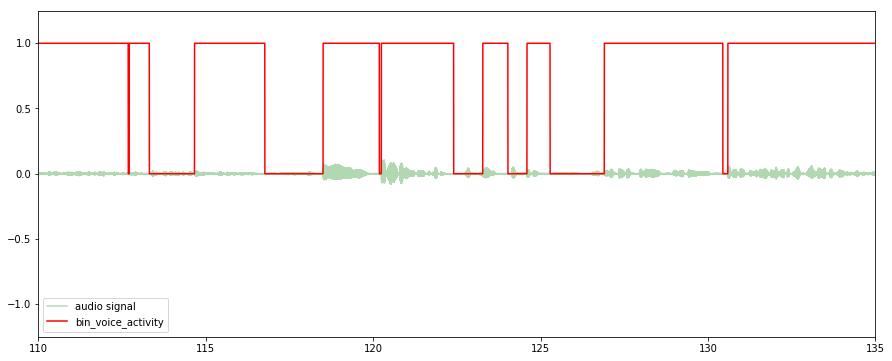

sessid_47_P1_sid_56
	Sampling rate: 8000


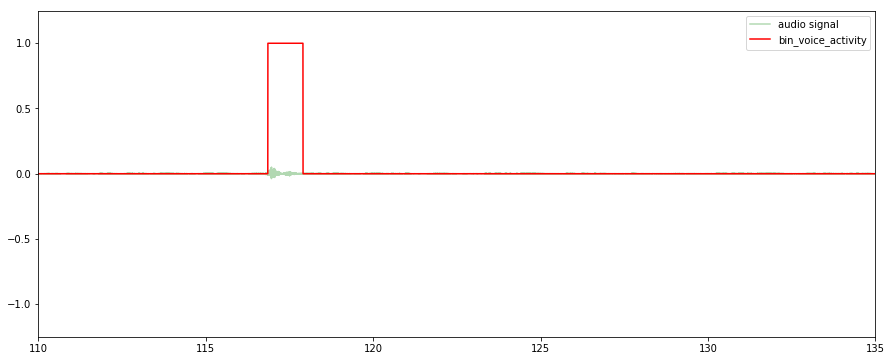

sessid_47_P2_sid_37
	Sampling rate: 8000


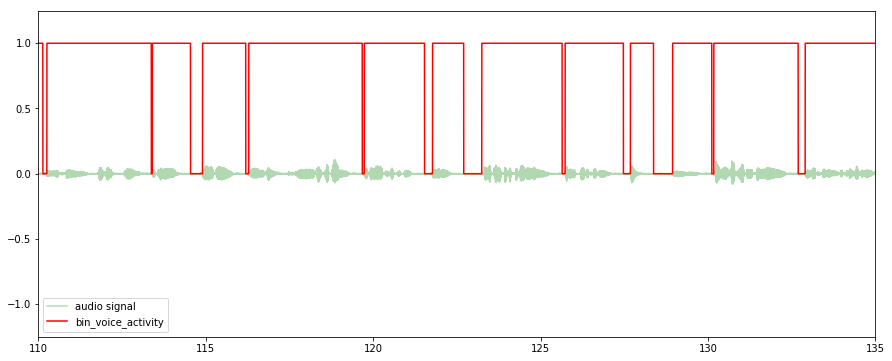

sessid_48_P1_sid_58
	Sampling rate: 8000


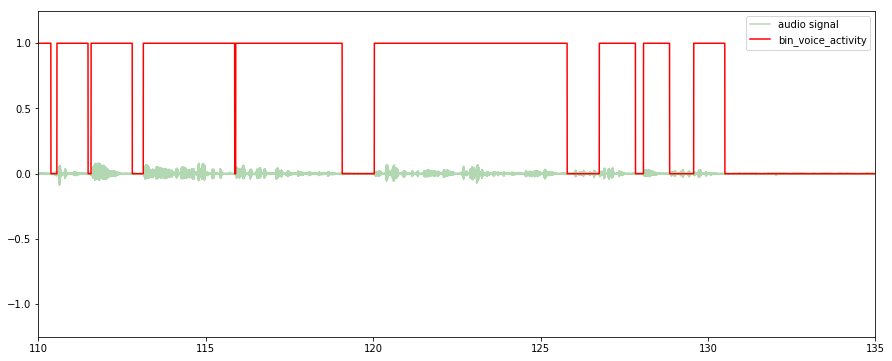

sessid_48_P2_sid_37
	Sampling rate: 8000


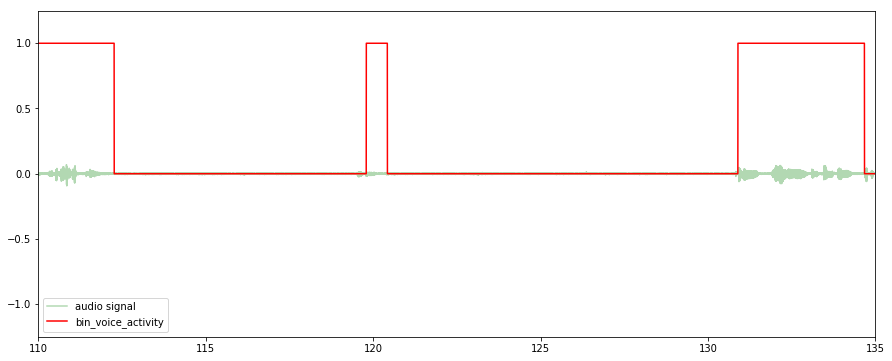

sessid_49_P1_sid_56
	Sampling rate: 8000


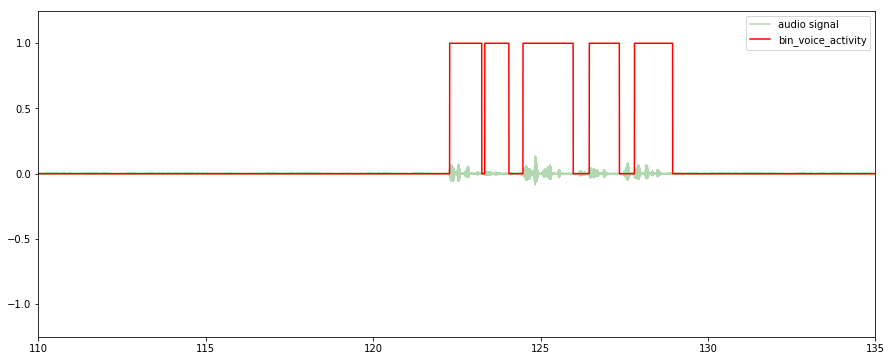

sessid_49_P2_sid_49
	Sampling rate: 8000


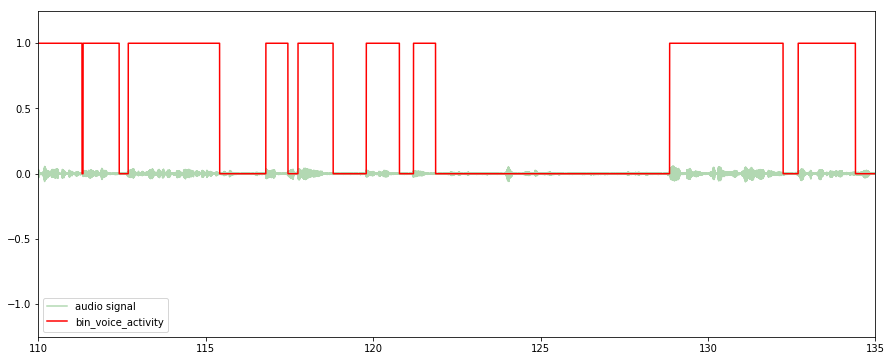

sessid_50_P1_sid_12
	Sampling rate: 8000


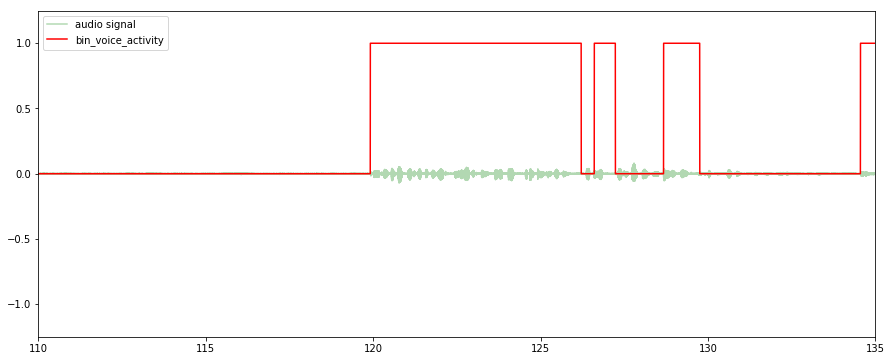

sessid_50_P2_sid_31
	Sampling rate: 8000


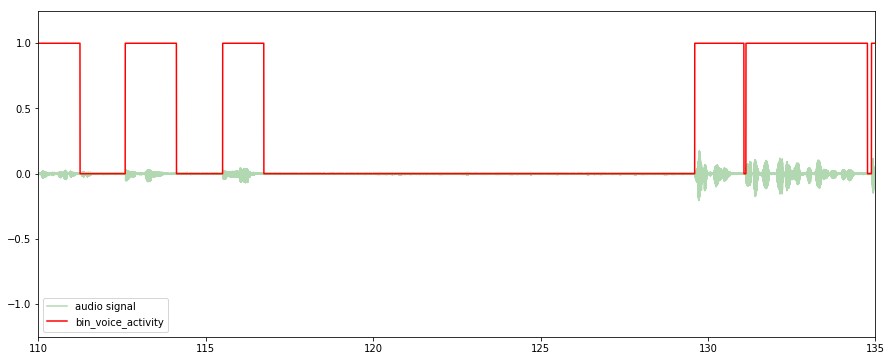

sessid_51_P1_sid_12
	Sampling rate: 8000


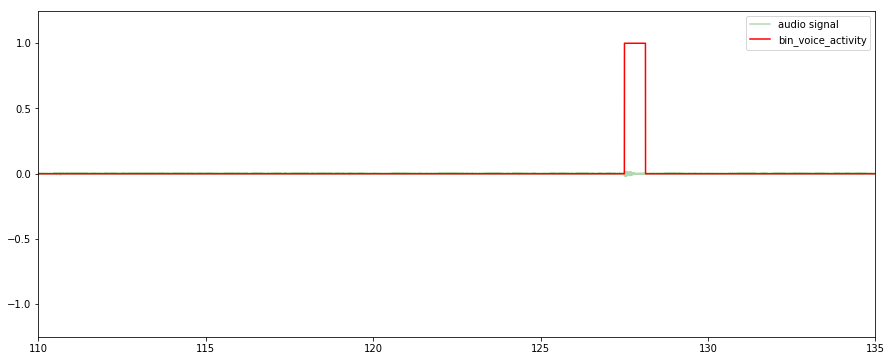

sessid_51_P2_sid_59
	Sampling rate: 8000


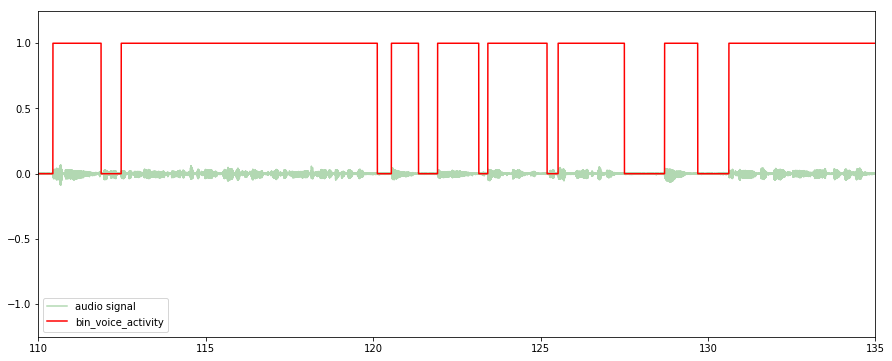

sessid_52_P1_sid_12
	Sampling rate: 8000


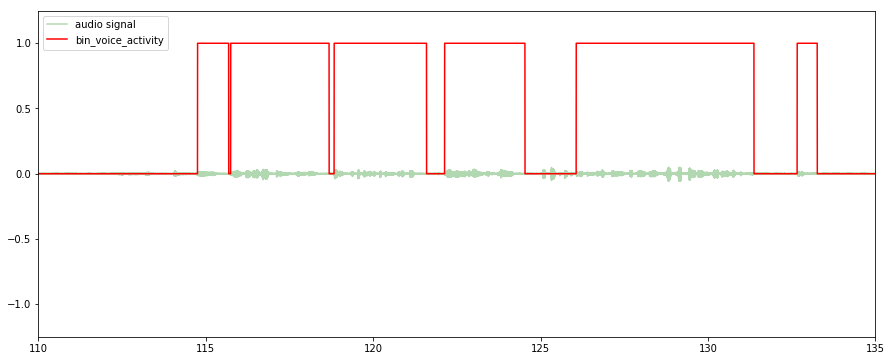

sessid_52_P2_sid_08
	Sampling rate: 8000


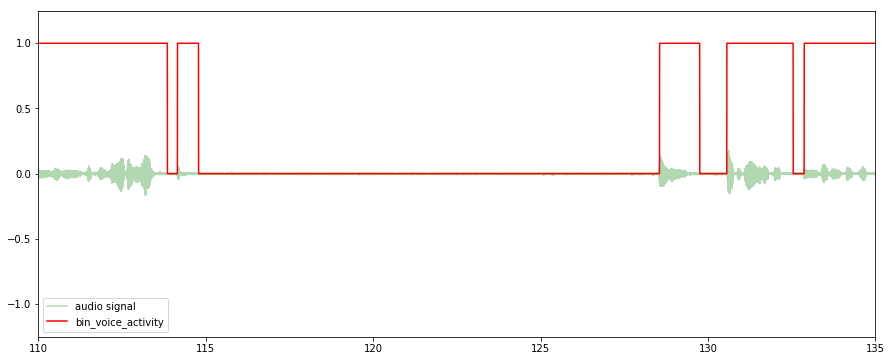

sessid_53_P1_sid_59
	Sampling rate: 8000


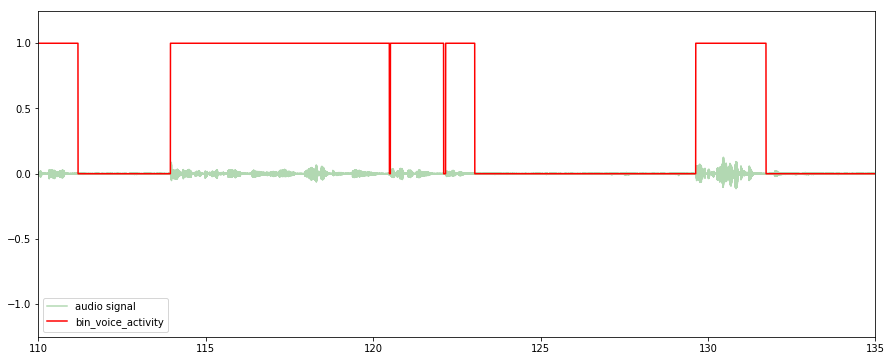

sessid_53_P2_sid_08
	Sampling rate: 8000


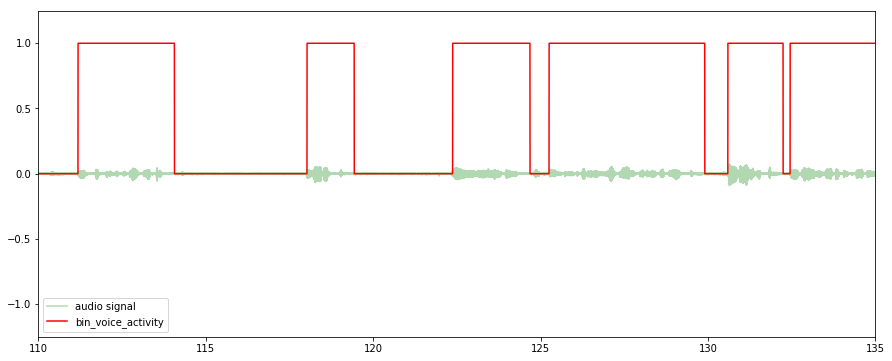

sessid_54_P1_sid_12
	Sampling rate: 8000


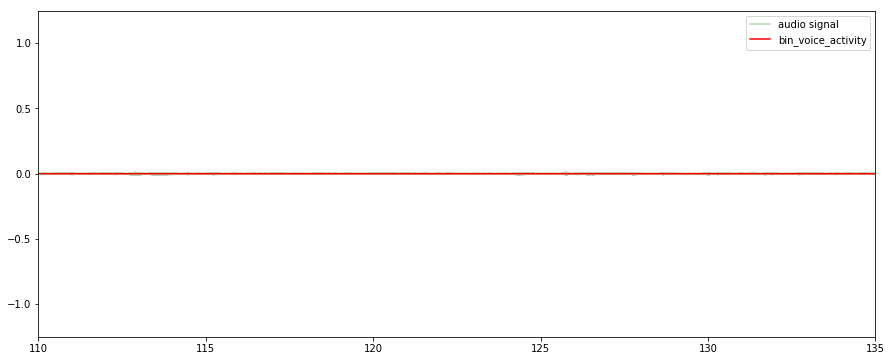

sessid_54_P2_sid_60
	Sampling rate: 8000


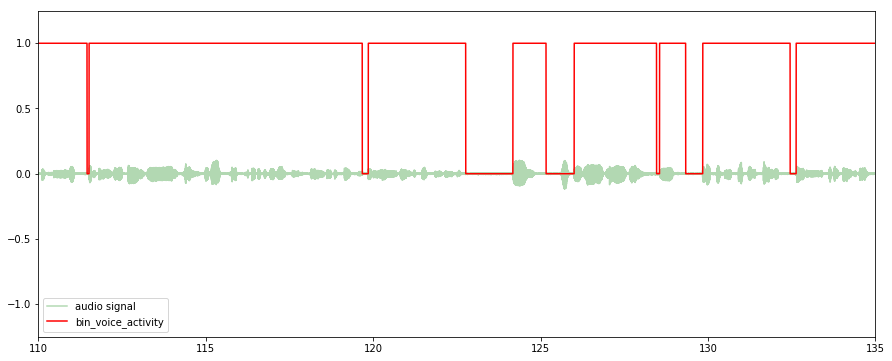

Processed 106 vad webrtc output files.


In [2]:
import glob
import numpy as np
import pandas as pd
import librosa
import soundfile as sf
from matplotlib import pyplot as plt

# Agressiveness of VAD: 0-3
AGGRESSIVENESS = 3

# Path to VAD OS outputs
vad_webrtc_outputs_dir = f'/home/ICT2000/jondras/dvra_datasets/mimicry/voice_activity_detection/vad_webrtc_{AGGRESSIVENESS}'
mono_audio_dir = '/home/ICT2000/jondras/dvra_datasets/mimicry/audio/audio_separated_8kHz'

# Iterate over VAD output segments
for i, vad_webrtc_output_file in enumerate(sorted(glob.glob(f'{vad_webrtc_outputs_dir}/vad_webrtc_*.csv'))):
    
    output_filename_split = vad_webrtc_output_file.split('/')[-1][:-4].split('_')
    audio_basename = '_'.join(output_filename_split[2:])
    print(audio_basename)
    
    # Load audio signal
    audio_signal, samplerate = sf.read(f'{mono_audio_dir}/{audio_basename}.wav')
    print(f'\tSampling rate: {samplerate}')
    x_audio_signal = np.arange(0, len(audio_signal) / samplerate, 1. / samplerate)[:len(audio_signal)]
    
    # Generate binary voice activity
    bin_voice_activity = np.zeros(len(audio_signal), dtype=int)
    df = pd.read_csv(vad_webrtc_output_file)
    for row in df.values:
        # print(row)
        bin_voice_activity = np.where((x_audio_signal >= row[0]) & (x_audio_signal <= row[1]), 1, bin_voice_activity)
    
    # Plot raw audio signal and bin_voice_activity
    plt.figure(figsize=[15,6])
    plt.plot(x_audio_signal, audio_signal, 'g-', alpha=0.3, label='audio signal')#,linewidth=2.0)
    plt.plot(x_audio_signal, bin_voice_activity,'r-', label='bin_voice_activity')#,linewidth=2.0)
    plt.xlim(110, 135)
    plt.ylim(-1.25, 1.25)
    plt.legend()
    plt.show()
    
#     break
        
print(f'Processed {i + 1} vad webrtc output files.')